# Assignment 11:  Scatter Plots and Recursion

## Your Information

At the start of each assignment, you will need to provide us your name and the name of the partner you worked with for this assignment (if you had one). Double click on the cell below or click once and hit enter to edit it. Replace "First Last" with your first name and last name. Replace "None" with the first and last name of your partner if you had one for this assignment. We ask for this information so we don't accuse you of cheating when your code looks like your partner's.

Please keep these lines commented so they don't cause an error.

In [1]:
# MY NAME: Chen Chen

# My PARTNER'S NAME: Akshana Jose

## Imports

Every project will begin with some import statements. It's crucial that you run the cell below, otherwise we will not be able to grade your code and provide feedback to you.

In [2]:
# it is considered a good coding practice to place all import statements at the top of the notebook

import json
from collections import namedtuple
import matplotlib.pyplot as plt

try:
    get_ipython().run_line_magic('matplotlib', 'inline') # running from notebook, show plots
except NameError:
    pass # Not running from notebook, no need to plot

import csv
import statistics

import os
import student_grader
student_grader.initialize(os.getcwd(), "p11")

## Feedback Server and Privacy/User Agreement

By using our feedback server, you are consenting to the transmission of your netid and password to authenticate your identity. We assure you that we will not store this information. This process is necessary for accessing feedback from our LLM system and is conducted in compliance with FERPA regulations.

To receive assistance from our LLM feedback system, you will need to provide your netid and password the first time you run a grader check cell with `should_get_llm_feedback=True`. Your credentials will be sent securely to our feedback server solely for authentication purposes. Upon successful authentication, you will receive a token that allows you to receive feedback without logging in again. This token will expire in 5 hours, after which you will need to log in again to continue using the feedback service.

If you have any questions or concerns about data privacy and security, please make a post on Piazza.

## Learning Objectives

After completing this assignment, you will be able to...
* create scatter plots
* define recursive functions
* analyze the data from P10
* make scatter plots using `matplotlib`
* remove outliers to make the plots more useful
* use recursion to gather new data

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: **P10 and P11 are two parts of the same data analysis.** You **cannot** switch project partners between these two projects. That is, if you partnered up with someone for P10, you have to sustain that partnership until end of P11. You may either continue to work with the same partner, or work on P11 alone. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f24/syllabus.html).

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

## Setup:

Before proceeding much further, make sure you have unzipped the p11 zip file.

Make sure that the project files are stored in the following structure:
(Note: In any of these directories, you may see files named `.DS_Store` and `.ipynb_checkpoints`. You will not use these automatically-generated files, but you will need to filter them out when you read the folder contents later in the notebook)

```
+-- p11.ipynb
+-- planets_small.json
+-- sample_data
|   +-- file_1.json
|   +-- 10
|   |   +-- file_2.json
|   |   +-- file_3.json
|   +-- 100
|   |   +-- file_4.json
|   |   +-- 1000
|   |   |   +-- file_5.json
+-- data
|   +-- mapping_1.json
|   +-- mapping_2.json
|   +-- mapping_3.json
|   +-- mapping_4.json
|   +-- mapping_5.json
|   +-- planets_1.csv
|   +-- planets_2.csv
|   +-- planets_3.csv
|   +-- planets_4.csv
|   +-- planets_5.csv
|   +-- stars_1.csv
|   +-- stars_2.csv
|   +-- stars_3.csv
|   +-- stars_4.csv
|   +-- stars_5.csv
+-- broken_data
|   +-- k2s.json
|   +-- others.json
|   +-- gj
|   |   +-- gjs.json
|   +-- hd
|   |   +-- 10000
|   |   |   +-- 10000s.json
|   |   +-- other
|   |   |   +-- others.json
|   +-- kepler
|   |   +-- 10
|   |   |   +-- 30
|   |   |   |   +-- 30s.json
|   |   |   +-- 20s.json
|   |   |   +-- 80s.json
|   |   |   +-- others.json
|   |   +-- 100
|   |   |   +-- 100
|   |   |   |   +-- 100s.json
|   |   |   |   +-- others.json
|   |   |   +-- 200
|   |   |   |   +-- 220s.json
|   |   |   |   +-- others.json
|   |   |   |   +-- 290
|   |   |   |   |   +-- 290s.json
|   |   |   +-- other
|   |   |   |   +-- others.json
|   |   +-- other
|   |   |   +-- others.json
|   +-- toi
|   |   +-- tois.json
```

Make sure that **all** files are stored in this **exact** file structure.

## Introduction:

In P10, you parsed the data in the `data` directory and created some useful data structures. In P11, you will be creating scatter plots, and using recursion to gather even more data.

In Lab-P11, you will practice creating scatter plots on a smaller dataset, and also practice writing some recursive functions.

## Lab Portion (22 questions, 2 functions)

### Loading in data:

Before proceeding further, we will need to load in some data. Recall that in P10, we created a **list** of `Planet` objects called `planets_list`. In P11, you will be analyzing this **list** and using the data in there to create scatter plots. If you have not finished P10, do not worry about it. For Lab-P11, you will instead be working with a sample dataset. The data we will be analyzing in Lab-P11 is stored in `planets_small.json`.

**Warning:** Note that the data in `planets_small.json` is **not** stored in the same format as the files in the `data` directory that you parsed in P10. This file has been created solely for Lab-P11, so it is easier to load in the data without having to create the functions that you need to create in P10 to read the actual dataset.

In [3]:
# we have defined the namedtuple 'Planet' for you

planets_attributes = ['planet_name',
                     'host_name', 
                     'discovery_method',
                     'discovery_year',
                     'controversial_flag',
                     'orbital_period',
                     'planet_radius',
                     'planet_mass',
                     'semi_major_radius',
                     'eccentricity',
                     'equilibrium_temperature',
                     'insolation_flux']

Planet = namedtuple("Planet", planets_attributes)

In [4]:
# we have parsed the data in 'planets_small.json' and created a list of Planet objects for you

def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f)

# add the planets in 'planets_small.json' as Planet objects to 'small_planets_list'
small_planets_list = []
for planet in read_json('planets_small.json'):
    small_planets_list.append(Planet(**planet))

# display the first three Planet objects in 'small_planets_list'
small_planets_list[:3]

[Planet(planet_name='11 Com b', host_name='11 Com', discovery_method='Radial Velocity', discovery_year=2007, controversial_flag=False, orbital_period=326.03, planet_radius=12.1, planet_mass=6165.6, semi_major_radius=1.29, eccentricity=0.231, equilibrium_temperature=None, insolation_flux=None),
 Planet(planet_name='11 UMi b', host_name='11 UMi', discovery_method='Radial Velocity', discovery_year=2009, controversial_flag=False, orbital_period=516.21997, planet_radius=12.3, planet_mass=4684.8142, semi_major_radius=1.53, eccentricity=0.08, equilibrium_temperature=None, insolation_flux=None),
 Planet(planet_name='14 And b', host_name='14 And', discovery_method='Radial Velocity', discovery_year=2008, controversial_flag=False, orbital_period=185.84, planet_radius=12.9, planet_mass=1525.5, semi_major_radius=0.83, eccentricity=0.0, equilibrium_temperature=None, insolation_flux=None)]

### Segment 1: Scatter Plots

We will first learn to create simple scatter plots.

### Lab Function 1: `plot_scatter(x_data, y_data, x_label, y_label, c, s)`

You have been provided with a function `plot_scatter` which can create scatter plots. You do not need to worry about how it works just yet. The function will be explained to you over the course of the lab.

In [5]:
def plot_scatter(x_data, y_data, x_label='x axis', y_label='y axis', c=None, s=7):
    plt.scatter(x_data, y_data, c=c, s=s)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

### Task 1.1: Simple plots with `plot_scatter`

#### Lab Question 1: Create a **scatter plot** with the points *(1, 1)*, *(2, 2)*, *(3, 3)*, and *(4, 4)*.

You **must** first compute **two lists** which contain the *x*-coordinates and *y*-coordinates of the above points respectively. 

Points possible: 4.0

In [6]:
# first compute and store the lists 'x' and 'y', but do NOT display them
# do NOT create the plot just yet

# we have done this one for you
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

In [7]:
student_grader.check("lab-q1", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q1...
Great job! You passed all test cases for this question.


True

Now, **plot** `x` and `y` as **scatter plot**. Your plot should look like this:

<div><img src="images/lab-q1.jpg" style="height: 300px;"/></div>

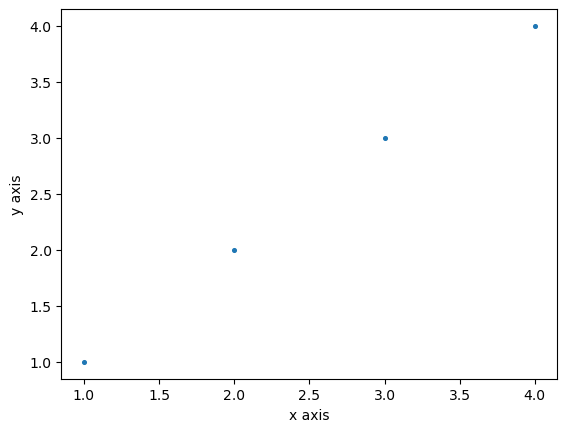

In [8]:
# plot 'x' and 'y'
# we have done this one for you

plot_scatter(x, y)


As you can see, in order to create the **scatter plot**, we had to create **two** lists `x` and `y`. The **list** `x` contains the data in the **x axis** and the **list** `y` contains the data in the **y axis**. For example, the element at index *0* of `x` is *1*, and the element at index *0* of `y` is *1*. Therefore, a point is added to the **scatter plot** at the position *(1, 1)*. Similarly, the other points are also added to the **scatter plot** using the `x` and `y` lists.

#### Lab Question 2: Create a **scatter plot** with the points *(1, 4)*, *(2, 1)*, *(3, 2)*, and *(4, 3)*.

You **must** create **two lists** and store the **x** and **y** values in these lists. In order to pass the autograder for scatter plots, you **must** define **both** **lists** properly.

Points possible: 4.0

In [9]:
# first compute and store the lists 'x' and 'y', but do NOT display them
# do NOT create the plot just yet

# replace the ... with your code

x = [1, 2, 3, 4]
y = [4, 1, 2, 3]


In [10]:
student_grader.check("lab-q2", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q2...
Great job! You passed all test cases for this question.


True

Now, **plot** `x` and `y` as **scatter plot**. Your plot should look like this:

<div><img src="images/lab-q2.jpg" style="height: 300px;"/></div>

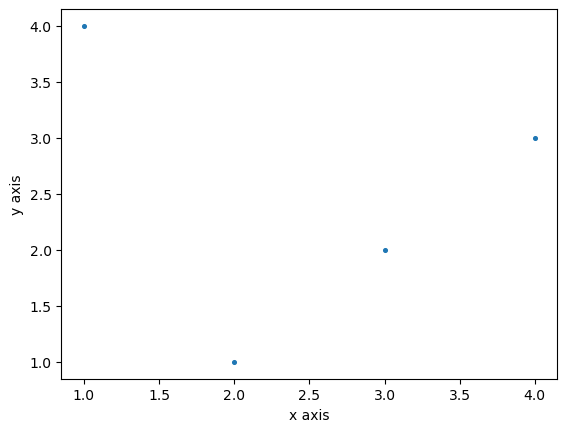

In [11]:
# plot 'x' and 'y'
# uncomment the line below and replace ... with your code

plot_scatter(x, y)


#### Lab Question 3: Create a **scatter plot** having the numbers *(1, 2, 3, ... 10)* on the **x axis** and their **squares** on the **y axis**.

You **must** create **two lists** and store the **x** and **y** values in these lists. In order to pass `grader.check` for scatter plots, you **must** define **both** **lists** properly.

Points possible: 4.0

In [12]:
# first compute and store the lists 'x' and 'y', but do NOT display them
# do NOT create the plot just yet

# replace the ... with your code

x = [i for i in range(1, 11)]
y = [j**2 for j in x]


In [13]:
student_grader.check("lab-q3", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q3...
Great job! You passed all test cases for this question.


True

Now, **plot** `x` and `y` as **scatter plot**. Your plot should look like this:

<div><img src="images/lab-q3.jpg" style="height: 300px;"/></div>

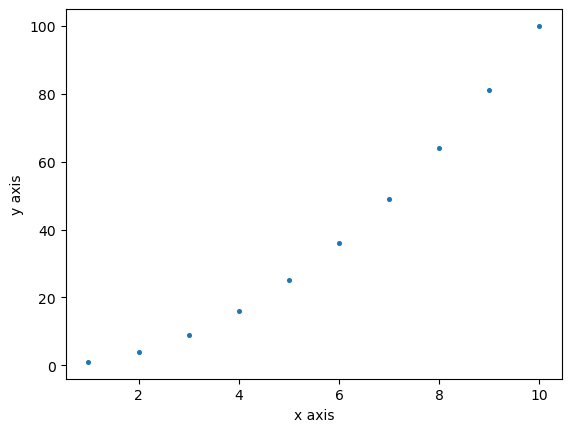

In [14]:
# plot 'x' and 'y'

plot_scatter(x, y)


Note that the labels on the **x axis** and the **y axis** are not very descriptive. We can add in our own labels using the `plot_scatter` function by passing two optional arguments to the parameters `x_label` and `y_label` respectively.

Now, **Plot** `x` and `y` as **scatter plot** with the **x-axis** labelled *Numbers*, and the **y-axis** labelled *Squares*. Your plot should look like this:

<div><img src="images/lab-q4.jpg" style="height: 300px;"/></div>

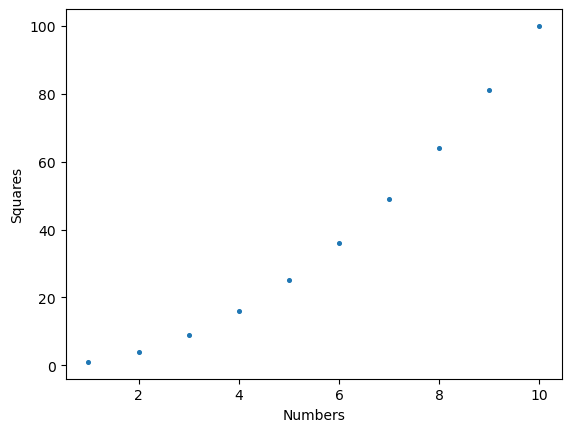

In [15]:
# we have already added in the label for the x axis
# complete the rest of the code and add the label for the y axis

plot_scatter(x, y, x_label="Numbers", y_label="Squares")


### Task 1.2: Plotting planets with `plot_scatter`

We will now create more interesting plots using the data in the variable `small_planets_list`. However, let us first get acquainted with the dataset.

#### Lab Question 4: What is the **number** of `Planet` objects in `small_planets_list` that were discovered in the time period *2000* to *2010* (both, inclusive)?

**Hint:** You can find the year of discovery of each `Planet` using the `discovery_year` attribute of the `Planet` objects.

Points possible: 4.0

In [16]:
# compute and store the answer in the variable 'planet_count_2000_2010', then display it

planet_count_2000_2010 = 0
for planet in small_planets_list:
    if planet.discovery_year >= 2000 and planet.discovery_year<=2010:
        planet_count_2000_2010 += 1

planet_count_2000_2010

480

In [17]:
student_grader.check("lab-q4", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q4...
Great job! You passed all test cases for this question.


True

#### Lab Question 5: What is the **percentage** of planets (in the range *0* to *100*) that have `insolation_flux` **greater** than *1000*?

You **must** ignore the `Planet` objects with **missing** `insolation_flux` data.

Points possible: 4.0

In [211]:
# compute and store the answer in the variable 'flux_1000_percentage', then display it
planet_count_insolation_flux = 0
planet_with_insolation_flux = 0
for planet in small_planets_list:
    if planet.insolation_flux != None:
        planet_with_insolation_flux += 1
        if planet.insolation_flux > 1000:
            planet_count_insolation_flux += 1

flux_1000_percentage = planet_count_insolation_flux*100/planet_with_insolation_flux
flux_1000_percentage

9.482758620689655

In [212]:
student_grader.check("lab-q5", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q5...
Great job! You passed all test cases for this question.


True

#### Lab Question 6: Create a **scatter plot** representing the `orbital_period` (on the **x-axis**) against the `semi_major_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list`.

You **must** ignore any `Planet` objects for which **either** the `orbital_period` or the `semi_major_radius` data is **missing**.

Points possible: 4.0

In [20]:
# we have computed the lists 'orbital_period' and 'semi_major_radii' for you

orbital_periods = []
semi_major_radii = []
for planet in small_planets_list:
    orbital_period = planet.orbital_period
    semi_major_radius = planet.semi_major_radius
    if orbital_period == None or semi_major_radius == None:
        continue
    orbital_periods.append(orbital_period)
    semi_major_radii.append(semi_major_radius)

In [21]:
student_grader.check("lab-q6", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q6...
Great job! You passed all test cases for this question.


True

Now, we will **plot** `orbital_periods` and `semi_major_radii` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*.

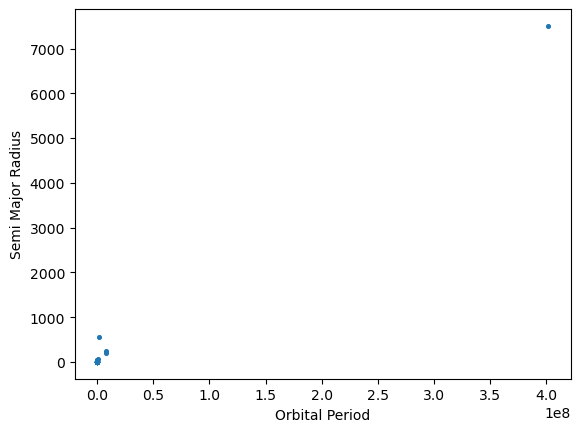

In [22]:
# we have done this for you

plot_scatter(orbital_periods, semi_major_radii, 'Orbital Period','Semi Major Radius')

Note that almost all the points in the plot are clustered near the **y axis**. This is because there are a few outliers with **extremely high** `orbital_period`. To get a better idea of what the data looks like, it would be useful to create a **scatter plot** without the **outliers**.

#### Lab Question 7: Create the same **scatter plot** as above, but **exclude** planets with `orbital_period` **more than** *1000*.

You **must** ignore any `Planet` objects for which **either** the `orbital_period` or the `semi_major_radius` data is **missing**. You **must** also ignore any `Planet` object with `orbital_period` **greater than** *1000*.

Points possible: 4.0

In [23]:
# first compute and store the lists 'orbital_periods_no_outliers' and 'semi_major_radii_no_outliers', 
# but do NOT display them
# do NOT create the plot just yet

orbital_periods_no_outliers = []
semi_major_radii_no_outliers = []

for planet in small_planets_list:
    orbital_period = planet.orbital_period
    semi_major_radius = planet.semi_major_radius
    if orbital_period == None or semi_major_radius == None:
        continue
    if orbital_period > 1000:
        continue
        
    orbital_periods_no_outliers.append(orbital_period)
    semi_major_radii_no_outliers.append(semi_major_radius)

In [24]:
student_grader.check("lab-q7", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q7...
Great job! You passed all test cases for this question.


True

Now, **plot** `orbital_periods_no_outliers` and `semi_major_radii_no_outliers` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*. Your plot should look like this:

<div><img src="images/lab-q8.jpg" style="height: 300px;"/></div>

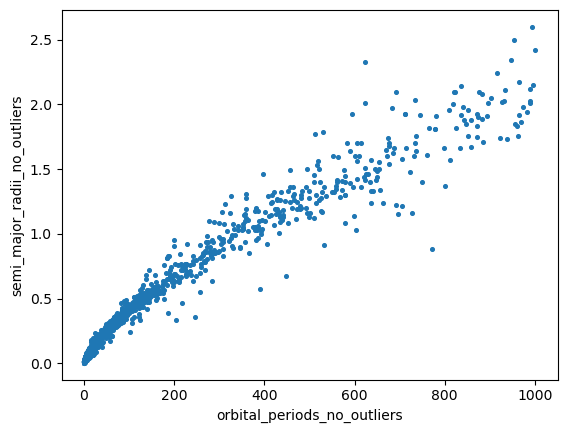

In [25]:
# plot 'orbital_periods_no_outliers' and 'semi_major_radii_no_outliers'

plot_scatter(orbital_periods_no_outliers, semi_major_radii_no_outliers,y_label='semi_major_radii_no_outliers',x_label = 'orbital_periods_no_outliers')


#### Lab Question 8: Create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list` whose `discovery_method` is *Transit*.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_method` data is **missing**. You **must** also ignore any `Planet` objects whose `discovery_method` is **not** *Transit*.

Points possible: 4.0

In [26]:
# first compute and store the lists 'transit_planet_masses', and 'transit_planet_radii'
# do NOT create the plot just yet

transit_planet_masses = []
transit_planet_radii = []

for planet in small_planets_list:
    planet_mass = planet.planet_mass
    planet_radius = planet.planet_radius
    if planet.discovery_method=='Transit':
        if planet_mass!=None and planet_radius!=None:
            transit_planet_masses.append(planet_mass)
            transit_planet_radii.append(planet_radius)


In [27]:
student_grader.check("lab-q8", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q8...
Great job! You passed all test cases for this question.


True

Now, **plot** `transit_planet_masses` and `transit_planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div><img src="images/lab-q9.jpg" style="height: 300px;"/></div>

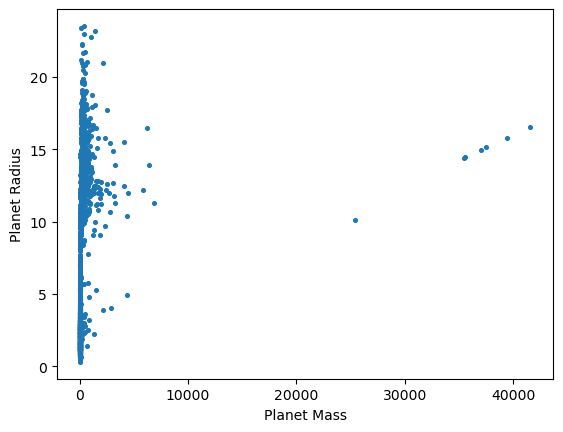

In [28]:
# plot 'transit_planet_masses' and 'transit_planet_radii'

plot_scatter(transit_planet_masses, transit_planet_radii, x_label = 'Planet Mass', y_label = 'Planet Radius')


#### Lab Question 9: Create the same **scatter plot** as above, but **exclude** planets with `planet_mass` **more than** *250*.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_method` data is **missing**. You **must** also ignore any `Planet` objects whose `discovery_method` is **not** *Transit* or have a `planet_mass` greater than *250*.

Points possible: 4.0

In [29]:
# first compute and store the lists 'transit_planet_masses_no_outliers', and 'transit_planet_radii_no_outliers'
# do NOT create the plot just yet

transit_planet_masses_no_outliers = []
transit_planet_radii_no_outliers = []


for planet in small_planets_list:
    planet_mass = planet.planet_mass
    planet_radius = planet.planet_radius
    if planet.discovery_method=='Transit':
        if planet_mass!=None and planet_radius!=None and planet_mass <= 250:
            transit_planet_masses_no_outliers.append(planet_mass)
            transit_planet_radii_no_outliers.append(planet_radius)


In [30]:
student_grader.check("lab-q9", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q9...
Great job! You passed all test cases for this question.


True

Now, **plot** `transit_planet_masses_no_outliers` and `transit_planet_radii_no_outliers` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div><img src="images/lab-q10.jpg" style="height: 300px;"/></div>

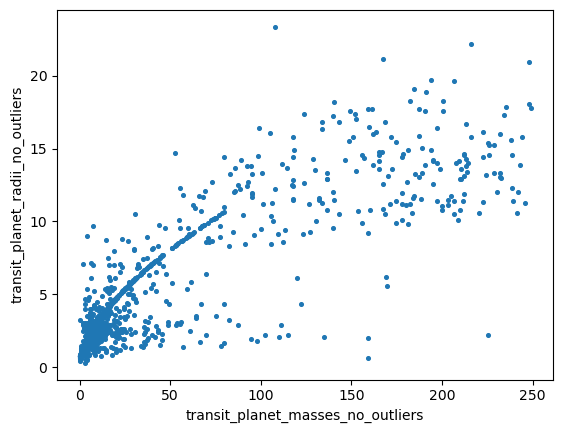

In [31]:
# plot 'transit_planet_masses_no_outliers' and 'transit_planet_radii_no_outliers'

plot_scatter(transit_planet_masses_no_outliers, transit_planet_radii_no_outliers, x_label = 'transit_planet_masses_no_outliers', y_label = 'transit_planet_radii_no_outliers')

### Task 1.3: Changing the color and the size of points with `plot_scatter`

So far, we have not used two of the **optional arguments** of the `plot_scatter` function: `c` and `s`. The parameter `c` can be used to change the **color** to the points on the **scatter plot**, while `s` can be used to change the **sizes** of the points on the **scatter plot**. These arguments can help in visualizing the data better, as in the examples below.

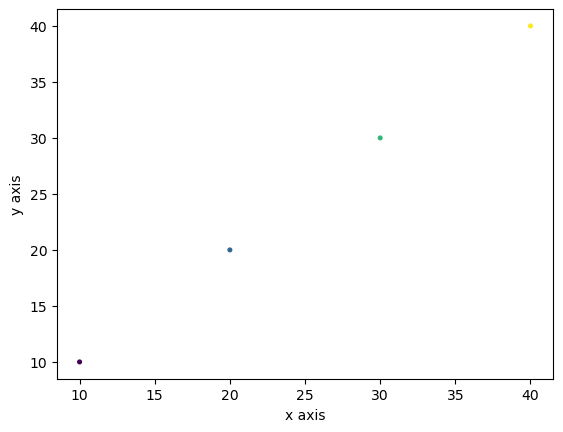

In [32]:
# run this cell

x = [10, 20, 30, 40]
y = [10, 20, 30, 40]
c = [10, 20, 30, 40]

plot_scatter(x, y, c=c)

#### Understanding the `c` argument:

In the example above, the argument passed to the `c` parameter was a **list** of numbers. The `plot_scatter` function used the values in this **list** to color each point in the plot. For example, the element at index *0* of `x` is *10*, the element at index *0* of `y` is *10*, and the element at index *0* of `c` is *10*. Therefore, the point at the position *(10, 10)* is colored using the number *10*. Similarly, the point at position *(20, 20)* is colored using the number *20*.

A **high** color value means that the color will be **lighter** while a **low** color value means that the color will be **darker**.

#### Understanding the `s` argument:

In comparison to the `c` argument, the `s` argument is relatively simpler to understand. Run the cell below, and try to figure out what happened.

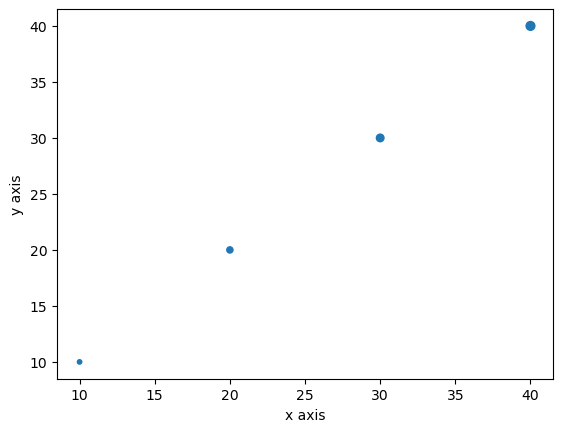

In [33]:
# run this cell

x = [10, 20, 30, 40]
y = [10, 20, 30, 40]
s = [10, 20, 30, 40]

plot_scatter(x, y, s=s)

#### Lab Question 10: Create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list` whose `discovery_method` is *Radial Velocity*. Additionally, **color** the points on the **scatter plot** depending on the `discovery_year`.

You **must** ignore all `Planet` objects with **missing** `planet_mass`, `planet_radius`, or `discovery_year` data.

Points possible: 4.0

In [34]:
# we have computed the lists 'orbital_period' and 'semi_major_radii' for you

rad_vel_planet_masses = []
rad_vel_planet_radii = []
rad_vel_discovery_years = []
for planet in small_planets_list:
    mass = planet.planet_mass
    radius = planet.planet_radius
    year = planet.discovery_year
    if mass == None or radius == None or year == None:
        continue
    if planet.discovery_method == 'Radial Velocity':
        rad_vel_planet_masses.append(mass)
        rad_vel_planet_radii.append(radius)
        rad_vel_discovery_years.append(year)

In [35]:
student_grader.check("lab-q10", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q10...
Great job! You passed all test cases for this question.


True

Now, we will **plot** `rad_vel_planet_masses` and `rad_vel_planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*, and **colored** using `rad_vel_discovery_years`.

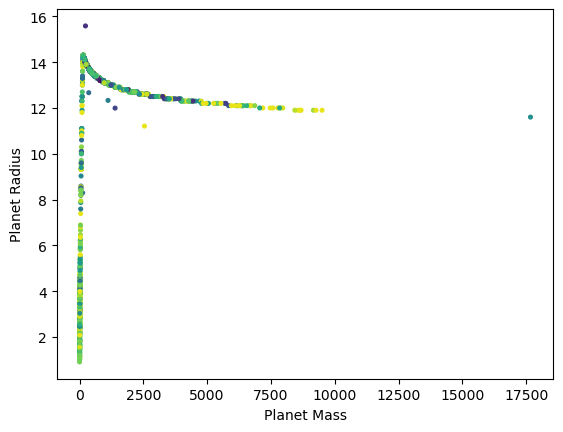

In [36]:
# we have done this for you

plot_scatter(rad_vel_planet_masses, rad_vel_planet_radii, 'Planet Mass','Planet Radius', c=rad_vel_discovery_years)

**Food for thought:** What do you think this plot signifies? Recall that a **lighter** color implies a **larger** value in the list `rad_vel_discovery_years`. Where are the lighter colors present in this plot? Can you guess why the colors are spread out the way they are?

In [37]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to
# The lighter colors represent the planets discovered earlier.

#### Lab Question 11: Excluding planets with `orbital_period` **more than** *1000*, create a **scatter plot** representing the `orbital_period` (on the **x-axis**) against the `semi_major_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list`. Additionally, **color** the points on the **scatter plot** depending on the `discovery_year`.

You **must** ignore any `Planet` objects for which **either** the `orbital_period`, `semi_major_radius` or `discovery_year` data is **missing**. You **must** also ignore any `Planet` objects whose `orbital_period` is greater than *1000*. You **must** use the `discovery_year` to **color** the points in the **scatter plot**.

Points possible: 4.0

In [38]:
# first compute and store the lists 'orbital_periods', 'semi_major_radii', and 'discovery_years'
# do NOT create the plot just yet

orbital_periods = []
semi_major_radii = []
discovery_years = []

for planet in small_planets_list:
    orbital_period = planet.orbital_period
    semi_major_radius = planet.semi_major_radius
    discovery_year = planet.discovery_year
    if orbital_period == None or semi_major_radius==None or discovery_year==None:
        continue
    if orbital_period > 1000:
        continue

    orbital_periods.append(orbital_period)
    semi_major_radii.append(semi_major_radius)
    discovery_years.append(discovery_year)


In [39]:
student_grader.check("lab-q11", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q11...
Great job! You passed all test cases for this question.


True

Now, **plot** `orbital_periods` and `semi_major_radii` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*, and **colored** using `discovery_years`. Your plot should look like this:

<div><img src="images/lab-q12.jpg" style="height: 300px;"/></div>

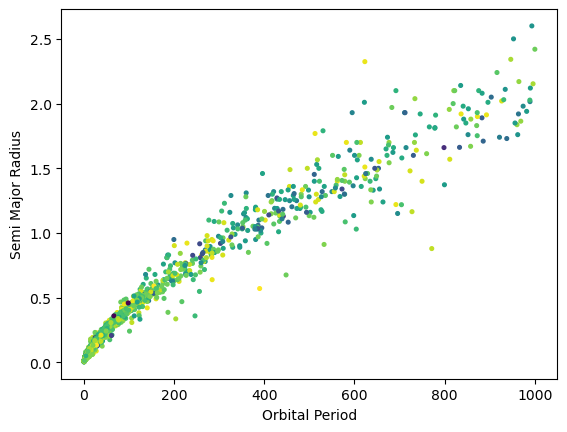

In [40]:
# plot 'orbital_periods' and 'semi_major_radii' with 'discovery_years' as colors

plot_scatter(orbital_periods, semi_major_radii, 'Orbital Period','Semi Major Radius', c=discovery_years)
    


#### Lab Question 12: Create the same plot as above, but additionally change the **size** of the points depending on the `planet_mass`.

You **must** ignore any `Planet` objects for which **either** the `orbital_period`, `semi_major_radius`, `discovery_year` or `planet_mass` data is **missing**. You **must** also ignore any `Planet` objects whose `orbital_period` is greater than *1000*. You **must** use the `discovery_year` to **color** the points in the **scatter plot** and you **must** use the `planet_mass` to change the **size** of the points.

Points possible: 4.0

In [41]:
# first compute and store the lists 'orbital_periods', 'semi_major_radii', 'discovery_years', and 'planet_masses'
# do NOT create the plot just yet

orbital_periods = []
semi_major_radii = []
discovery_years = []
planet_masses = []

for planet in small_planets_list:
    
    orbital_period = planet.orbital_period
    semi_major_radius = planet.semi_major_radius
    discovery_year = planet.discovery_year
    planet_mass = planet.planet_mass
    
    if orbital_period == None or semi_major_radius== None or discovery_year==None or planet_mass == None:
        continue
    if orbital_period > 1000:
        continue

    orbital_periods.append(orbital_period)
    semi_major_radii.append(semi_major_radius)
    discovery_years.append(discovery_year)
    planet_masses.append(planet_mass)


In [42]:
student_grader.check("lab-q12", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q12...
Great job! You passed all test cases for this question.


True

Now, **plot** `orbital_periods` and `semi_major_radii` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*, **colored** using `discovery_years`, and **sized** using `planet_masses`. Your plot should look like this:

<div><img src="images/lab-q13.jpg" style="height: 300px;"/></div>

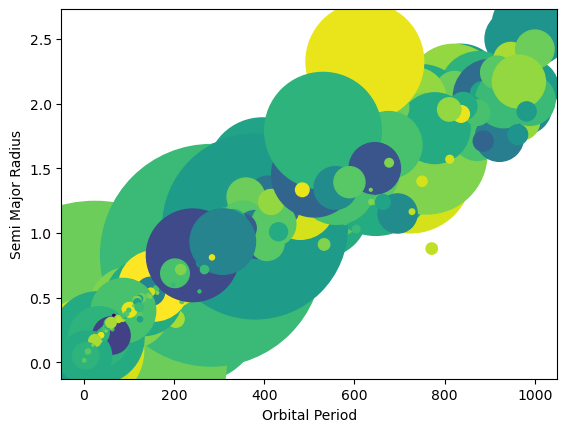

In [43]:
# plot 'orbital_periods' and 'semi_major_radii' with 'discovery_years' as colors and 'planet_masses' as sizes

plot_scatter(orbital_periods, semi_major_radii, 'Orbital Period','Semi Major Radius', c=discovery_years,s = planet_masses)


### Task 1.4: Plotting multiple scatter plots with `plot_scatter_multiple`

### Lab Function 2: `plot_scatter_multiple(x_data_dict, y_data_dict, x_label, y_label)`

So far, we have used `plot_scatter` to create **scatter plots** using two **lists**, and we have seen how to use the `c` argument to color the **scatter plots** based on another **list** containing *numeric* data. It would be good if we could also **color** the points using *non-numeric* data. For example, we might want to create a **scatter plot** of the `planet_mass` against the `planet_radius`, and **color** the points differently depending on the `discovery_method`. However, since the `discovery_method` is **non-numeric**, the `plot_scatter` function will not be of help (you can try!)

You have been provided with another function `plot_scatter_multiple` which can create **multiple** scatter plots on the same plot.

In [44]:
def plot_scatter_multiple(x_data_dict, y_data_dict, x_label='x axis', y_label='y axis'):
    legend_values = list(x_data_dict.keys())
    for key in x_data_dict:
        plt.scatter(x_data_dict[key], y_data_dict[key], s=7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend_values)
    plt.show()

Here is a quick example to see how this function works:

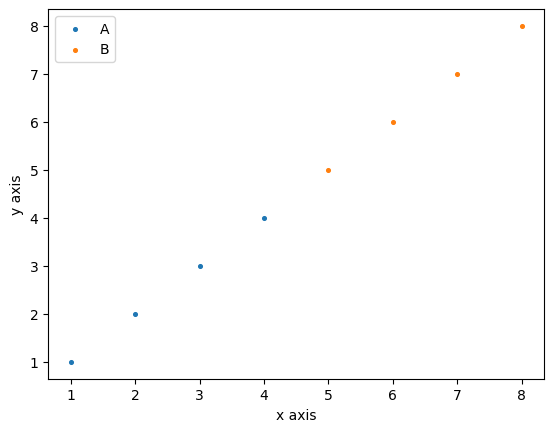

In [45]:
# run this cell

x_dict = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
y_dict = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
plot_scatter_multiple(x_dict, y_dict)

As you can see, in order to create the **scatter plot**, we had to create **two** dictionaries `x_dict` and `y_dict`. Both **dictionaries** contain the same **keys** (which correspond to the **different colors** on the plot). Corresponding to each **key**, the value in the **dictionary** `x_dict` contains the data in the **x axis** and the value in the **dictionary** `y_dict` contains the data in the **y axis**. For example, the element at index *0* of `x_dict['A']` is *1*, and the element at index *0* of `y_dict['A']` is *1*. Therefore, a point is added to the **scatter plot** at the position *(1, 1)* in the **color** corresponding to the **key** `A`. On the other hand, the element at index *0* of `x_dict['B']` is *5*, and the element at index *0* of `y_dict['B']` is *5*. Therefore, a point is added to the **scatter plot** at the position *(5, 5)* in the **color** corresponding to the **key** `B`.

#### Lab Question 13: Excluding planets with `planet_mass` **more than** *250*, create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object of **each** `discovery_method`.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_method` data is **missing**. You **must** also ignore any `Planet` objects whose `planet_mass` is more than *250*. You **must** color the points depending on the `discovery_method`.

Points possible: 4.0

In [46]:
# we have computed the dictionaries 'planet_masses' and 'planet_radii' for you

planet_masses = {}
planet_radii = {}
for planet in small_planets_list:
    method = planet.discovery_method
    mass = planet.planet_mass
    radius = planet.planet_radius
    if method == None or mass == None or radius == None:
        continue
    if mass > 250:
        continue
    if method not in planet_masses:
        planet_masses[method] = []
        planet_radii[method] = []
    planet_masses[method].append(mass)
    planet_radii[method].append(radius)

planet_masses

{'Radial Velocity': [146.2018,
  228.83645,
  187.5197,
  3.95,
  138.89171,
  2.58,
  10.62,
  7.4,
  10.2,
  16.2,
  4.0,
  13.0,
  8.2,
  11.73969,
  6.6,
  10.6,
  13.9,
  8.4,
  8.0,
  1.71,
  7.14,
  11.07,
  16.57,
  22.1,
  13.2,
  2.82,
  5.2,
  5.36,
  2.82,
  104.244,
  11.09,
  9.0,
  13.64,
  2.96,
  216.0,
  66.74397,
  19.66,
  9.65,
  13.02,
  5.63,
  6.624,
  79.4575,
  54.0311,
  130.3103,
  16.0,
  113.9,
  28.6047,
  197.046,
  116.0,
  11.2,
  50.8528,
  203.41018,
  82.95,
  85.8141,
  143.02278,
  113.46531,
  55.30242,
  72.85079,
  238.37131,
  6.3566,
  75.32571,
  119.96298,
  26.61699,
  51.25631,
  63.566,
  13.63484,
  20.42286,
  28.55,
  120.7754,
  6.6,
  238.37131,
  235.18,
  181.16219,
  82.6358,
  22.1,
  140.79869,
  16.14,
  9.53485,
  85.8141,
  209.7678,
  190.06234,
  8.98,
  15.1,
  25.74423,
  12.214,
  127.132,
  16.46,
  177.9848,
  42.86581,
  73.1009,
  123.42834,
  34.2,
  165.265,
  232.0159,
  153.1,
  212.9461,
  13.0,
  162.0933,
  9

In [47]:
student_grader.check("lab-q13", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q13...
Great job! You passed all test cases for this question.


True

Now, **plot** `planet_masses` and `planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div><img src="images/lab-q14.jpg" style="height: 300px;"/></div>

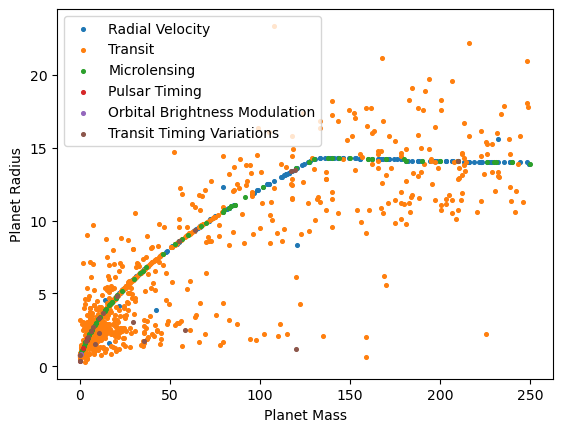

In [48]:
# we have done this for you

plot_scatter_multiple(planet_masses, planet_radii, 'Planet Mass','Planet Radius')

In [49]:
# we have defined this function for you
# this will be a helpful function for the next question

def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year - 9) + ' to ' + str(year)
    else:
        decade_start = year - (year % 10) + 1
        decade = str(decade_start) + ' to ' + str(decade_start + 9)
    return decade

#### Lab Question 14: Excluding planets with `planet_mass` **more than** *250*, create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object discovered in **each decade**.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_year` data is **missing**. You **must** also ignore any `Planet` object which has `planet_mass` more than *250*. You **must** color the points depending on the **decade** of the `discovery_year`.

**Hint:** You can use the `year_to_decade` function defined in the previous cell to determine the **decade** that a given year belongs to.

Points possible: 4.0

In [50]:
# first compute and store the dictionaries 'planet_masses', and 'planet_radii'
# do NOT create the plot just yet

planet_masses = {}
planet_radii = {}

for planet in small_planets_list:
    method = planet.discovery_method
    mass = planet.planet_mass
    radius = planet.planet_radius
    planet_discovery_year = planet.discovery_year
    planet_discovery_decade = year_to_decade(planet_discovery_year)
    
    if method == None or mass == None or radius == None:
        continue
    if mass > 250:
        continue
    if planet_discovery_decade not in planet_masses:
        planet_masses[planet_discovery_decade] = []
        planet_radii[planet_discovery_decade] = []
        
    planet_masses[planet_discovery_decade].append(mass)
    planet_radii[planet_discovery_decade].append(radius)

planet_masses

{'1991 to 2000': [146.2018,
  187.5197,
  82.6358,
  177.9848,
  232.0159,
  71.8,
  155.7367,
  209.76675,
  166.218,
  206.34463,
  0.02,
  4.3,
  3.9,
  218.531,
  226.9846],
 '2011 to 2020': [22.2481,
  3.95,
  170.032,
  12.2,
  85.81,
  165.26,
  153.82972,
  47.6745,
  138.89171,
  2.58,
  1.15,
  4.16,
  0.26,
  0.688,
  1.12,
  1.01,
  0.972,
  4.35,
  27.0,
  5.35,
  3.19,
  11.7,
  1.32,
  7.4,
  10.2,
  16.2,
  4.0,
  13.0,
  8.2,
  6.6,
  10.6,
  13.9,
  8.0,
  7.14,
  11.07,
  16.57,
  13.2,
  5.36,
  2.82,
  9.0,
  66.74397,
  19.66,
  9.65,
  13.02,
  5.63,
  6.624,
  197.05,
  198.953,
  216.1244,
  84.857,
  190.372,
  152.5584,
  210.395,
  156.684,
  98.20947,
  241.5508,
  184.97706,
  167.49641,
  248.86089,
  108.0622,
  230.10892,
  167.17858,
  172.58169,
  194.82979,
  206.5895,
  168.4499,
  213.58176,
  207.54299,
  224.38798,
  31.46517,
  23.51942,
  200.2329,
  82.95363,
  177.9848,
  222.481,
  54.98459,
  117.27927,
  77.23269,
  112.19399,
  75.323,
  

In [51]:
student_grader.check("lab-q14", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q14...
Great job! You passed all test cases for this question.


True

Now, **plot** `planet_masses` and `planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div><img src="images/lab-q15.jpg" style="height: 300px;"/></div>

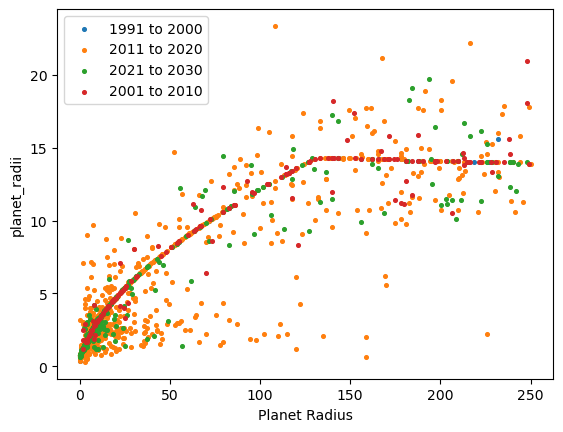

In [52]:
# plot 'planet_masses' and 'planet_radii'

plot_scatter_multiple(planet_masses, planet_radii, x_label = 'Planet Radius', y_label = 'planet_radii',)


### Segment 2: Recursion

In addition to **scatter plots**, you will also have to write some **recursive** functions in P11. You can now practice creating some **recursive** functions here.

### Task 2.1: Flattening a Nested List

A **nested list** is a **list** which contains **lists** as its elements, and these **lists** can themselves contain other **lists** (and so on). **Flattening** a **nested list** involves extracting all the elements in a **nested list**. For example, if a **nested list** is as follows:

```python
[[1, 2], 3, [4, [5, 6], [[7], 8, [9, 10]]]]
```

then the **flattened** version of this list would be:

```python
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
```

### Lab Function 3: `flatten(some_list)`

We are now going to write a **recursive** function to **flatten** a **nested list** and print out all the elements in list.

Let's first consider a **simple case**: when there are no **nested lists** inside the input **list** (i.e., there could be **lists** inside the input **list** but these **lists** have no additional **lists** inside them).

Points possible: 6.0

In [53]:
# we have started this function for you

# NOTE: THE GRADER WILL FAIL WHEN YOU FIRST RUN IT
# You will have to come back and modify this function after a few questions 
# After modifying the function, the grader should pass if done correctly.

def flatten(some_list):
    # initialize an empty list into a variable called 'flattened_list'   
    flattened_list = []
    # iterate over every item inside some_list
    for item in some_list:
        # if item is a list, extend new list by item
        if type(item) == list:
             flattened_list.extend(flatten(item))
        # otherwise, append item to the new list
        else:
            flattened_list.append(item)
    return flattened_list

In [54]:
student_grader.check("lab-flatten", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-flatten...
Great job! You passed all test cases for this question.


True

#### Lab Question 15: What is the output of `flatten(['rabbit', ['cat'], ['lion', 'chimpanzee']])`?

Run the cell below to see how the flatten function works.

Points possible: 4.0

In [55]:
# we have done this one for you

animals = flatten(['rabbit', ['cat'], ['lion', 'chimpanzee']])

animals

['rabbit', 'cat', 'lion', 'chimpanzee']

In [56]:
student_grader.check("lab-q15", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q15...
Great job! You passed all test cases for this question.


True

The function `flatten` works when the input is a **list** which does not have any **nested lists** inside it. While this is a good start, we are not finished yet, as this next example shows:

In [57]:
# run this cell

nested_animals = ["turtle", ["skunk", ["raccoon"], "crocodile"]]

print("flatten does this: ", flatten(nested_animals))
print("flatten should do this: ", ['turtle', 'skunk', 'raccoon', 'crocodile'])

flatten does this:  ['turtle', 'skunk', 'raccoon', 'crocodile']
flatten should do this:  ['turtle', 'skunk', 'raccoon', 'crocodile']


Go back and **update** the function so that it works even if the **lists** in the input `some_list` have additional **nested lists** inside them.

Here is some hints for how your function **must** look:

```python
def flatten(some_list):
    # TODO: initialize an empty list into a variable called 'flattened_list'
    # TODO: iterate over every 'item' inside 'some_list'
        # TODO: check if type of 'item' is list
            # TODO: call 'flatten' function on 'item'
            # TODO: add the elements of the returned list to 'flattened_list'
        # TODO: if item is not a list, just add to 'flattened_list'
    # TODO: return 'flattened_list'
```

**Hint:** Now would be a good time for you to review `append` vs `extend` list methods. Run the following cell to see what these list methods do:

In [58]:
# run this cell

list1 = [1, 2, 3, 4]
list1.append([4, 5, 6])
print("'append' does this:", list1)

list2 = [1, 2, 3, 4]
list2.extend([4, 5, 6])
print("'extend' does this:", list2)

'append' does this: [1, 2, 3, 4, [4, 5, 6]]
'extend' does this: [1, 2, 3, 4, 4, 5, 6]


**Warning:** `flatten` is quite a complicated function, so do **not** try to implement it in one sitting. Practice incremental coding here. First, try to **print** the outcome the recursive call to `flatten(item)` before you figure out how to add it to your list `flattened_list`.

#### Lab Question 16: What is the output of the `flatten` function when run against the below **nested list** `nested_names`?

```python
nested_names = ["Adam", ["Bob", ["Chet"]], "Bea", ["Treasure", "Andy", ["Ann"]]]
```

Points possible: 4.0

In [59]:
# replace ... with your code

nested_names = ["Adam", ["Bob", ["Chet"]], "Bea", ["Treasure", "Andy", ["Ann"]]]

flattened_names = flatten(nested_names)

flattened_names

['Adam', 'Bob', 'Chet', 'Bea', 'Treasure', 'Andy', 'Ann']

In [60]:
student_grader.check("lab-q16", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q16...
Great job! You passed all test cases for this question.


True

#### Lab Question 17: What is the output of the `flatten` function when run against the below **nested list** `more_nested_names`?

```python
more_nested_names = ["Adam", ["Bob", ["Chet", "Cat"], "Barb", "Bert"], "Alex", ["Bea", ["Gold", \
                     ["Andy"]], "Ann"]]
```

Points possible: 4.0

In [61]:
# replace ... with your code

more_nested_names = ["Adam", ["Bob", ["Chet", "Cat"], "Barb", "Bert"], "Alex", ["Bea", ["Gold", \
                     ["Andy"]], "Ann"]]

more_flattened_names = flatten(more_nested_names)

more_flattened_names

['Adam',
 'Bob',
 'Chet',
 'Cat',
 'Barb',
 'Bert',
 'Alex',
 'Bea',
 'Gold',
 'Andy',
 'Ann']

In [62]:
student_grader.check("lab-q17", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q17...
Great job! You passed all test cases for this question.


True

### Task 2.2: Explore a directory recursively

In Task 2.1, we practiced how to **recursively** collect elements in a **nested list**. In Task 2.2, we are going to **recursively** collect all the **paths** of files in a **given directory**. After collecting them, your function `get_all_paths_in` will return a **list of paths**  to files inside this directory, that has been **sorted** in **reverse-alphabetical** order after **splitting** by the **path separator**. We will practice our function on the `sample_data` directory.

#### Lab Question 18: What are the **files** and **sub-directories** that are inside the `sample_data` directory?

Your output **must** be a **list** containing the **names** of the **files** and **sub-directories**. You **must** ignore all files and sub-directories whose names begin `"."`. You **must** **explicitly** sort the **list** in **descending** (i.e., reverse alphabetical) **order** after **splitting** by the **path separator**.

<h3 style="color:red">Important Warning:</h3> 

It is important to remember that the output of `os.listdir` must always be **sorted** before it is used. It is also important to remember that while sorting, you **must** **split** the paths by the **path separator**. To recall why these steps are necessary, it is recommended that you read through Segment 2 of Lab-P10.

Points possible: 4.0

In [63]:
# we have done this one for you

# even though there are no path separators in `sample_data_contents`, it is still a good idea to sort
# after splitting by the path separator, so you don't forget to do that when it will actually be necessary
directory = "sample_data"
sample_data_contents = sorted([content for content in os.listdir(directory) if not content.startswith(".")],\
                              key=lambda content: content.split(os.path.sep), reverse=True)

sample_data_contents

['file_1.json', '100', '10']

In [64]:
student_grader.check("lab-q18", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q18...
Great job! You passed all test cases for this question.


True

#### Lab Question 19: How **many** **files** (i.e., **not** **sub-directories**) are in the `sample_data` directory?

Your output **must** be an **int**. You **must** ignore all files whose names begin `"."`.

**Hints:**

1. Use the `os.path.isfile` function to recognize **files** from **directories**.
2. You **must** pass the **relative path** of the **file** to determine if it is a file. For example, if you want to determine if the file `file_1.json` inside the directory `sample_data` is a **file**, you must use

```python
os.path.isfile(os.path.join("sample_data", "file_1.json"))
```

Points possible: 4.0

In [65]:
# compute and store the answer in the variable 'num_sample_data_files', then display it

directory = "sample_data"

# TODO: find the number of files in 'directory'

num_sample_data_files = len([file for file in os.listdir(directory) if os.path.isfile(os.path.join("sample_data", file))==True])

num_sample_data_files

1

In [66]:
student_grader.check("lab-q19", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q19...
Great job! You passed all test cases for this question.


True

#### Lab Question 20: What are the **relative paths** of the **sub-directories** (i.e., **not files**) that are inside the `sample_data` directory?

Your output **must** be a **list** containing the **relative paths** of the **sub-directories**. You **must** ignore all sub-directories whose names begin `"."`. You **must** **explicitly** sort the **list** in **descending** (i.e., reverse alphabetical) **order** after **splitting** by the **path separator**.

**Hint:** Use the `os.path.isdir` function to differentiate between **directories** and files.

**Warning:** Use `os.path.join` to get the **relative paths** of the **sub-directories**. Remember you **must not** hardcode `'\\'` or `'/'` in your paths.

Points possible: 4.0

In [67]:
# compute and store the answer in the variable 'sample_data_directories', then display it

directory = "sample_data"

# TODO: list the sub-directories in 'directory'

sample_data_directories = sorted([os.path.join(directory,file) for file in os.listdir(directory) if os.path.isdir(os.path.join("sample_data", file))==True],reverse=True)

sample_data_directories

['sample_data/100', 'sample_data/10']

In [68]:
student_grader.check("lab-q20", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q20...
Great job! You passed all test cases for this question.


True

We are now ready to define our recursive function.

### Lab Function 4:  `get_all_paths_in(directory)`

You **must** write this function that takes in the **relative path** of a `directory` as its input, and returns a **list** of **relative paths** of all the **files** inside `directory` and its subdirectories.

Note: In any of these directories, you may see auto-generated files/directories named `.DS_Store` and `.ipynb_checkpoints`. You **must** **ignore** these (all files that start with `"."`), and your output **must** be **explicitly** sorted in **reverse alphabetical** order after **splitting** by the **path separator**.

In other words, if a directory `sample_data` looks like this:
```
+-- sample_data
|   +-- .DS_Store    [possibly]
|   +-- file_1.json
|   +-- 10
|   |   +-- .ipynb_checkpoints    [possibly]
|   |   +-- file_2.json
|   |   +-- file_3.json
|   +-- 100
|   |   +-- file_4.json
|   |   +-- 1000
|   |   |   +-- file_5.json
```

then the output of the function call `get_all_paths_in("sample_data")` must be **one of the two lists below**, depending on whether the code is run on a Windows computer or a Mac: 
```python
['sample_data\\file_1.json',
 'sample_data\\100\\file_4.json',
 'sample_data\\100\\1000\\file_5.json',
 'sample_data\\10\\file_3.json',
 'sample_data\\10\\file_2.json']
```
OR
```python
['sample_data/file_1.json',
 'sample_data/100/file_4.json',
 'sample_data/100/1000/file_5.json',
 'sample_data/10/file_3.json',
 'sample_data/10/file_2.json']
```

Points possible: 6.0

In [69]:
# define the 'get_all_paths_in' function here

def get_all_paths_in(directory):
    # TODO: initialize an empty list
    path_list = []
    # TODO: loop through all files and directories in 'directory' that do not start with "."
    for item in os.listdir(directory):
    # TODO: check if it is a directory
        full_path = os.path.join(directory, item)
        if item.startswith('.') == True:
            continue
        if os.path.isdir(full_path):
            # TODO: call 'get_all_paths_in' and add returned paths to your list
                path_list.extend(get_all_paths_in(full_path))
        # TODO: if it is a file, directly add to your list
        elif os.path.isfile(full_path):
                path_list.append(full_path)
    # TODO: sort the list of paths after splitting by the path separator and then return the list
    
    return sorted(path_list,reverse=True)



In [70]:
student_grader.check("lab-get_all_paths_in", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-get_all_paths_in...
Great job! You passed all test cases for this question.


True

#### Lab Question 21: How **many** files are there in total, in the `100` directory of the `sample_data` directory?

You **must** use the `get_all_paths_in` function to answer this question.

Points possible: 4.0

In [71]:
# we have done this one for you

num_files_sample_100 = len(get_all_paths_in(os.path.join("sample_data", "100")))

num_files_sample_100

2

In [72]:
student_grader.check("lab-q21", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q21...
Great job! You passed all test cases for this question.


True

#### Lab Question 22: What are the **relative paths** of all the **files** that are inside the `sample_data` directory?

Your output **must** be a **list** containing the **relative paths** of **files**. You **must** use the `get_all_paths_in` function to answer this question.

Points possible: 4.0

In [73]:
# compute and store the answer in the variable 'sample_data_all_files', then display it

sample_data_all_files = get_all_paths_in('sample_data')

sample_data_all_files

['sample_data/file_1.json',
 'sample_data/100/file_4.json',
 'sample_data/100/1000/file_5.json',
 'sample_data/10/file_3.json',
 'sample_data/10/file_2.json']

In [74]:
student_grader.check("lab-q22", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q22...
Great job! You passed all test cases for this question.


True

### Submitting the lab

Submit your `p11.ipynb` on Gradescope to the lab-p11 assignment, like usual. Remember that the grades for the lab portion of the project and the actual assignment grade are independent. You will submit the same notebook (at different levels of completion) to two different assignments.

## Project Portion (20 questions, 4 functions, 2 data structures)

### Project Description:

You have already parsed the data in the `data` directory in P10. You will now dive deeper by analyzing this data and arrive at some exciting conclusions about various planets and stars outside our Solar System. You will also use recursion to retrieve data from the broken JSON file in the `data` directory, and ask some interesting questions about the data.

### Project Requirements:

You **may not** hardcode indices in your code, unless the question explicitly says so. If you open your `.csv` files with Excel, manually count through the rows and use this number to loop through the dataset, this is also considered as hardcoding. If any instances of hardcoding are found during code review, the Gradescope autograder will **deduct** points from your public score.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because the autograder grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, the autograder will **deduct** points from your public test score, even if the way you did it produced the correct answer.

#### Required Functions:
- `star_cell`
- `get_stars`
- `planet_cell`
- `get_planets`
- `plot_scatter`
- `plot_scatter_multiple`
- `get_all_paths_in`
- `get_surface_gravity`
- `get_distances_to_star`
- `get_liquid_water_distances`
- `get_surface_temperatures`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, the autograder will **deduct** points from your public test score, even if the way you did it produced the correct answer.

#### Required Data Structures:
- `Star` (**namedtuple**)
- `stars_dict` (**dictionary** mapping **strings** to `Star` objects)
- `Planet` (**namedtuple**)
- `planets_list` (**list** of `Planet` objects)
- `star_classes` (**dictionary**)
- `all_planets_list` (**list** of `Planet` objects)

In addition, you are also **required** to follow the requirements below:

* You **must** never use the output of the `os.listdir` function directly. You **must** always first remove all files and directories that start with `"."`, and **explicitly sort** the list before doing anything with it.
* You are **not** allowed to use **modules** like `pandas` to answer the questions in this project.
* You **must** properly **label** the axes of all your **plots**.
* Do **not** define multiple functions with the same name or define multiple versions of one function with different names. Just keep the best version.
* Do **not** leave in irrelevant output or test code that we didn't ask for.

Otherwise, the autograder will **deduct** points from your public score.

### Loading in the Stars and Planets:

Before we can analyze the data in the `data` directory, we must first copy/paste all the functions and data structures you created in P10 to parse the data. We have done this for you.

In [75]:
# the definition of the namedtuple 'Star'

star_attributes = ['spectral_type',
                  'stellar_effective_temperature',
                  'stellar_radius',
                  'stellar_mass',
                  'stellar_luminosity',
                  'stellar_surface_gravity',
                  'stellar_age']

Star = namedtuple("Star", star_attributes)

In [76]:
# the definition of the function 'process_csv'

def process_csv(filename):
    with open(filename) as file:
        csv_reader = csv.reader(file)
        list_data = list(csv_reader)
        return list_data

In [77]:
# the definition of the function 'star_cell'

stars_1_csv = process_csv(os.path.join("data", "stars_1.csv"))
stars_header = stars_1_csv[0]
stars_1_rows = stars_1_csv[1:]

def star_cell(row_idx, col_name, stars_rows, header=stars_header):
    col_idx = header.index(col_name)
    val = stars_rows[row_idx][col_idx]
    if val == '':
        return None
    elif col_name in ["Stellar Effective Temperature [K]", "Stellar Radius [Solar Radius]", \
                     "Stellar Mass [Solar mass]", "Stellar Luminosity [log(Solar)]", \
                      "Stellar Surface Gravity [log10(cm/s**2)]", "Stellar Age [Gyr]"]:
        return float(val)
    else:
        return val

In [78]:
# the definition of the function 'get_stars'

def get_stars(star_file):
    stars_data = process_csv(star_file)
    stars_header = stars_data[0]
    stars_rows = stars_data[1:]
    stars = {}
    for row_idx in range(len(stars_rows)):
        star_name = star_cell(row_idx, 'Star Name', stars_rows)
        spectral_type = star_cell(row_idx, 'Spectral Type', stars_rows)
        stellar_effective_temperature = star_cell(row_idx, 'Stellar Effective Temperature [K]', stars_rows)
        stellar_radius = star_cell(row_idx, 'Stellar Radius [Solar Radius]', stars_rows)
        stellar_mass = star_cell(row_idx, 'Stellar Mass [Solar mass]', stars_rows)
        stellar_luminosity = star_cell(row_idx, 'Stellar Luminosity [log(Solar)]', stars_rows)
        stellar_surface_gravity = star_cell(row_idx, 'Stellar Surface Gravity [log10(cm/s**2)]', stars_rows)
        stellar_age = star_cell(row_idx, 'Stellar Age [Gyr]', stars_rows)

        star = Star(spectral_type, stellar_effective_temperature, stellar_radius, \
                          stellar_mass, stellar_luminosity, stellar_surface_gravity, stellar_age)
        stars[star_name] = star
    return stars

In [79]:
# the definition of the dictionary 'stars_dict'

stars_dict = {}
for i in range(1, 6):
    csv_file = os.path.join("data", "stars_%d.csv" % i)
    curr_stars_dict = get_stars(csv_file)
    stars_dict.update(curr_stars_dict)
    
len(stars_dict)

4166

In [80]:
# the definition of the namedtuple 'Planet'

planets_attributes = ['planet_name',
                     'host_name', 
                     'discovery_method',
                     'discovery_year',
                     'controversial_flag',
                     'orbital_period',
                     'planet_radius',
                     'planet_mass',
                     'semi_major_radius',
                     'eccentricity',
                     'equilibrium_temperature',
                     'insolation_flux']

Planet = namedtuple("Planet", planets_attributes)

In [81]:
# the definition of the function 'read_json'

def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f)

In [82]:
# the definition of the function 'planet_cell'

planets_1_csv = process_csv(os.path.join("data", "planets_1.csv"))
planets_header = planets_1_csv[0]
planets_1_rows = planets_1_csv[1:]

def planet_cell(row_idx, col_name, planets_rows, header=planets_header):
    col_idx = header.index(col_name)
    val = planets_rows[row_idx][col_idx]
    if val == '':
        return None
    if col_name in ["Controversial Flag"]:
        if val == "1":
            return True
        else:
            return False
    elif col_name in ['Discovery Year']:
        return int(val)
    elif col_name in ['Orbital Period [days]', 'Planet Radius [Earth Radius]', 
                     'Planet Mass [Earth Mass]', 'Orbit Semi-Major Axis [au]', 'Eccentricity',
                     'Equilibrium Temperature [K]', 'Insolation Flux [Earth Flux]']:
        return float(val)
    else:
        return val

In [83]:
# the definition of the function 'get_planets'

def get_planets(planet_file, mapping_file):
    planets = []
    try:
        mapping_dict = read_json(mapping_file)
    except json.JSONDecodeError:
        return []
    planets_csv = process_csv(planet_file)
    planets_header = planets_csv[0]
    planets_rows = planets_csv[1:]

    for row_idx in range(len(planets_rows)):
        try:
            planet_name = planet_cell(row_idx, 'Planet Name', planets_rows)
            host_name = mapping_dict[planet_name]
            discovery_method = planet_cell(row_idx, 'Discovery Method', planets_rows)
            discovery_year = planet_cell(row_idx, 'Discovery Year', planets_rows)
            controversial_flag = planet_cell(row_idx, 'Controversial Flag', planets_rows)
            orbital_period = planet_cell(row_idx, 'Orbital Period [days]', planets_rows)
            planet_radius = planet_cell(row_idx, 'Planet Radius [Earth Radius]', planets_rows)
            planet_mass = planet_cell(row_idx, 'Planet Mass [Earth Mass]', planets_rows)
            semi_major_radius = planet_cell(row_idx, 'Orbit Semi-Major Axis [au]', planets_rows)
            eccentricity = planet_cell(row_idx, 'Eccentricity', planets_rows)
            equilibrium_temperature = planet_cell(row_idx, 'Equilibrium Temperature [K]', planets_rows)
            insolation_flux = planet_cell(row_idx, 'Insolation Flux [Earth Flux]', planets_rows)

            planet = Planet(planet_name, host_name, discovery_method, discovery_year,\
                              controversial_flag, orbital_period, planet_radius, planet_mass,\
                              semi_major_radius, eccentricity, equilibrium_temperature, insolation_flux)
            planets.append(planet)
        except IndexError:
            continue
        except ValueError:
            continue
        except KeyError:
            continue
    
    return planets

In [84]:
# the definition of the list 'planets_list'

planets_list = []
for i in range(1, 6):
    planet_path = os.path.join("data", "planets_%d.csv" % i)
    mapping_path = os.path.join("data", "mapping_%d.json" % i)
    planets_list.extend(get_planets(planet_path, mapping_path))

len(planets_list)

5072

### Segment 1: Verifying Laws of Nature:

We will now use our dataset to verify some well-known laws of nature. Unless specified otherwise, you **must** use `stars_dict` and `planets_list` to access all data.

### Task 1.1: Kepler's Third Law

We will first verify [Kepler's Third Law](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Third_law). This law states that the **square** of the `orbital_period` of each planet in a solar system is directly proportional to the **cube** of the `semi_major_radius` of its orbit around its host star.

Since this law relates only to planets that orbit the same host star, we will verify this law using the several planets orbiting around a star named *GJ 9827*.

#### Question 1: Compute the **ratio** of the **square** of the `orbital_period` to the **cube** of the `semi_major_radius` of each planet orbiting the star *GJ 9827*.

Your output **must** be a **list** of **floats**. You may **assume** that the planets orbiting this star do not have any missing `orbital_period` or `semi_major_radius` data.

Points possible: 4.0

In [85]:
# compute and store the answer in the variable 'ratios_gj9827', then display it

ratios_gj9827 = []

for planet in planets_list:
    if planet.host_name == 'GJ 9827':
        orbital_period = planet.orbital_period
        semi_major_radius = planet.semi_major_radius
        ratio = orbital_period**2/semi_major_radius**3
        ratios_gj9827.append(ratio)

ratios_gj9827

[216495.31853581898, 215944.87249258577, 215532.12435359438]

In [86]:
student_grader.check("q1", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q1...
Great job! You passed all test cases for this question.


True

The **ratios** of the three stars in this system appear to be very close to each other. It will be useful if we could quantify exactly how close these ratios are to each other. One way to do that would to be compute the [coefficient of variance](https://en.wikipedia.org/wiki/Coefficient_of_variation), which is defined as the **standard deviation** divided by the **mean** of a sequence of numbers. A low value would imply that the numbers are very **close** to each other.

#### Question 2: Compute the **coefficient of variance** of the **list** `ratios_gj9827`.

**Hint:** You can compute the **standard deviation** and the **mean** of a **list** of numbers using the `statistics.stdev` and `statistics.mean` functions inside the `statistics` module. You can read the documentation for the `statistics.stdev` and `statistics.mean` functions by creating a new cell and using `help(statistics.mean)` and `help(statistics.mean)`.

Points possible: 4.0

In [87]:
# compute and store the answer in the variable 'coeff_gj9827', then display it

coeff_gj9827 = statistics.stdev(ratios_gj9827)/statistics.mean(ratios_gj9827)

coeff_gj9827

0.002237293472030457

In [88]:
student_grader.check("q2", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q2...
Great job! You passed all test cases for this question.


True

As we can see, the **coefficient of variance** is indeed very low. This lends credibility to Kepler's Third Law. However, there is yet more we can do with this data. After we adjust for the units used in our dataset, we find that Kepler's Third Law predicts the following:

$$\texttt{stellar mass} = \frac{133408}{\texttt{ratio}}$$

where $\texttt{ratio}$ is the **mean** of the ratios of the **square** of the `orbital_period` to the **cube** of the `semi_major_radius` computed above, and $\texttt{stellar mass}$ is the mass of the planets' host star.

We can therefore check how close this **predicted** `stellar_mass` is to the **actual** `stellar_mass` of the star.

#### Question 3: Compute the percentage change of the **predicted** `stellar_mass` from the **actual** `stellar_mass` of the star *GJ 9827*.

You **must** compute the **predicted** `stellar_mass` as the number *133408* divided by the **mean** of the ratios of the three planets computed in Question 1. You **must** find the **actual** `stellar_mass` by accessing the correct attribute of the `Star` object of *GJ 9827*. The percentage change can be computed as:

$$\texttt{percent change} = \frac{\texttt{predicted stellar mass} - \texttt{actual stellar mass}}{\texttt{actual stellar mass}} \times 100$$

Points possible: 4.0

In [89]:
# compute and store the answer in the variable 'percentage_change', then display it

predicted_stellar_mass = 133408/statistics.mean(ratios_gj9827)
actual_stellar_mass = stars_dict['GJ 9827'].stellar_mass
percentage_change = (predicted_stellar_mass-actual_stellar_mass)*100/actual_stellar_mass
percentage_change


-0.3780616360737003

In [90]:
student_grader.check("q3", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q3...
Great job! You passed all test cases for this question.


True

### Task 1.2: Stefan-Boltzmann Law

We will now verify the [Stefan-Boltzmann Law](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law). This law states that the `insolation_flux` of a *black body* is directly proportional to the **fourth** power of the `equilibrium_temperature`. In our dataset, we have the `insolation_flux` and `equilibrium_temperature` data of the `Planet` objects. So, we can verify how well this law is obeyed by the planets in our dataset.

#### Question 4: Create a **scatter plot** representing the `insolation_flux` (on the **x-axis**) against the **fourth power** of the `equilibrium_temperature` (on the **y-axis**) of each `Planet` object in `planets_list`.

You **must** ignore all `Planet` objects with **missing** `insolation_flux`, or `equilibrium_temperature` data.

You **must** first compute two **lists** containing the **insolation_flux**, and the fourth power of the **equilibrium_temperature** of each `Planet` object (which has all the data available). Then, you **must** use `plot_scatter` to plot the **insolation_flux** against the fourth power of the **equilibrium_temperature**.

Points possible: 4.0

In [91]:
# first compute and store the lists 'flux_list', and 'temp_4th_power_list'
# do NOT display or plot just yet

flux_list = []
temp_4th_power_list = []

for planet in planets_list:
    if planet.insolation_flux == None or planet.equilibrium_temperature == None:
        continue
    flux_list.append(planet.insolation_flux)
    temp_4th_power_list.append(planet.equilibrium_temperature**4)


In [92]:
student_grader.check("q4", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q4...
Great job! You passed all test cases for this question.


True

Now, **plot** `flux_list` and `temp_4th_power_list` as **scatter plot** with the **x-axis** labelled *Insolation Flux*, and the **y-axis** labelled *(Equilibrium Temperature)\*\*4*.

Your plot should look like this:

<div style="text-align: center;"><img src="images/q4.png" style="height: 400px;"/></div>

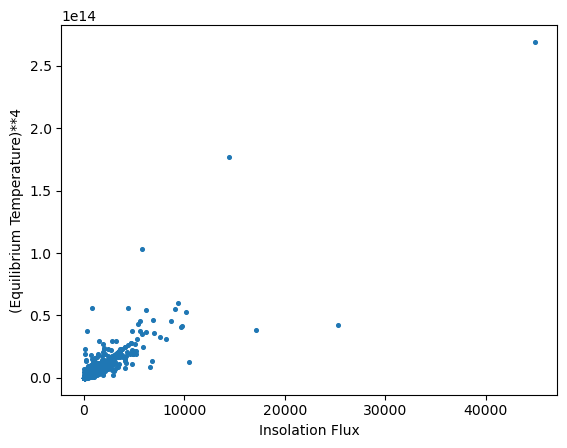

In [93]:
# create a scatter plot using 'flux_list' and 'temp_4th_power_list'

plot_scatter(flux_list, temp_4th_power_list, 'Insolation Flux', '(Equilibrium Temperature)**4')
 

**Food for thought:** Why does this graph look so strange with all the points bunched up near the bottom-left corner?

In [94]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to
# Because there are outliers.

#### Question 5: Create the same **scatter plot** as above, but **exclude** planets with `insolation_flux` **more than** *7000*.

You **must** ignore all `Planet` objects with **missing** `insolation_flux`, or `equilibrium_temperature` data. You **must** also exclude all `Planet` objects with `insolation_flux` more than *7000*.

You **must** first compute two **lists** containing the **insolation_flux**, and the fourth power of the **equilibrium_temperature** of each `Planet` object (which has all the data available). Then, you **must** use `plot_scatter` to plot the **insolation_flux** against the fourth power of the **equilibrium_temperature**.

Points possible: 4.0

In [95]:
# first compute and store the lists 'flux_list_no_outliers', and 'temp_4th_power_list_no_outliers'
# do NOT display or plot just yet

flux_list_no_outliers = []
temp_4th_power_list_no_outliers = []

for planet in planets_list:
    if planet.insolation_flux == None or planet.equilibrium_temperature == None or planet.insolation_flux > 7000:
        continue
    flux_list_no_outliers.append(planet.insolation_flux)
    temp_4th_power_list_no_outliers.append(planet.equilibrium_temperature**4)


In [96]:
student_grader.check("q5", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q5...
Great job! You passed all test cases for this question.


True

Now, **plot** `flux_list_no_outliers` and `temp_4th_power_list_no_outliers` as **scatter plot** with the **x-axis** labelled *Insolation Flux*, and the **y-axis** labelled *(Equilibrium Temperature)\*\*4*.

Your plot should look like this:

<div style="text-align: center;"><img src="images/q5.jpg" style="height: 400px;"/></div>

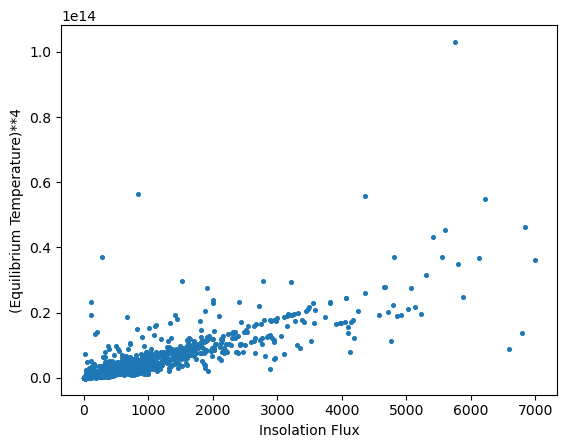

In [97]:
# Create a scatter plot using 'flux_list_no_outliers' and 'temp_4th_power_list_no_outliers'

plot_scatter(flux_list_no_outliers, temp_4th_power_list_no_outliers, 'Insolation Flux', '(Equilibrium Temperature)**4')
 

**Food for thought:** Does the relationship between **insolation flux** and the **fourth power of the equilibrium temperature** appear to be **linear** as predicted by the Stefan-Boltzmann Law? Can you explain why the graph isn't perfectly linear?

In [98]:
# Food for thought is an entirely OPTIONAL exercise
# yes it looks similar.
# you may leave your thoughts here as a comment if you wish to


### Segment 2: Stellar Evolution

[Stellar Evolution](https://en.wikipedia.org/wiki/Stellar_evolution) is a description of the way that stars change with time. The primary factor determining how a star evolves is its `stellar_mass`. Depending on the `stellar_mass` of each `Star`, astronomers can predict how the `Star` will end up. A `Star` whose `stellar_mass` is $\geq 0.3$ and $< 8$ times the mass of the Sun will become a [Red Giant](https://en.wikipedia.org/wiki/Red_giant), while a `Star` whose `stellar_mass` is $\geq 8$ and $< 10.5$ times the mass of the Sun will become a [White Dwarf](https://en.wikipedia.org/wiki/White_dwarf). A `Star` that is even bigger will end up as a [Neutron Star](https://en.wikipedia.org/wiki/Neutron_star).

### Data Structure 1: `star_classes`

You **must** now classify the `Star` objects in `stars_dict` using their `stellar_mass`. You **must** create a **dictionary** `star_classes` with the **keys**: `Red Giant`, `White Dwarf`, and `Neutron Star`. The **value** of each **key** must be a **list** of **strings** containing the **names** of the `Star` objects.

You **must** **ignore** `Star` objects for which we do not have `stellar_mass` data or have `stellar_mass` **less** than *0.3* Solar masses.

**Hint:** Recall that the `stellar_mass` data already uses units of *Solar masses*. So, a `stellar_mass` of *1* means that the `Star` object has the same mass as the Sun, and a `stellar_mass` of 2 means the `Star` object has twice the mass of the Sun, and so on.

Points possible: 4.0

In [99]:
# define the variable 'star_classes' here
# but do NOT display

star_classes = {'Red Giant':[],
               'White Dwarf':[],
               'Neutron Star':[]}

for star in stars_dict.items():
    if star[1].stellar_mass == None or star[1].stellar_mass<0.3:
        continue
    elif star[1].stellar_mass >= 0.3 and star[1].stellar_mass < 8:
        star_classes['Red Giant'].append(star[0])
    elif star[1].stellar_mass>= 8 and star[1].stellar_mass < 10.5:
        star_classes['White Dwarf'].append(star[0])
    else:
        star_classes['Neutron Star'].append(star[0])


In [100]:
student_grader.check("star_classes", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for star_classes...
Great job! You passed all test cases for this question.


True

You can **verify** that you have defined `star_classes` correctly by checking that there are *4006* Red Giants, *3* White Dwarfs, and *1* Neutron Star in `star_classes`.

#### Question 6: What is the **average** `stellar_luminosity` of each class of `Star` objects in `star_classes`?

Your output **must** be a **dictionary** mapping the class of the star to the **average** `stellar_luminosity` value of all `Star` objects of that class. You **must** ignore the `Star` objects with **missing** `stellar_luminosity` data.

The expected output of this question is:

```python
{'Red Giant': -0.02548807672369097,
 'White Dwarf': 2.787333333333333,
 'Neutron Star': 2.86}
```

Points possible: 4.0

In [101]:
# compute and store the answer in the variable 'star_classes_avg_lum', then display it

# TODO: initialize 'star_classes_avg_lum'
star_classes_avg_lum = {}
# TODO: loop through each 'star_class' in 'star_classes'
for key in star_classes:
    total_luminosity = 0
    count_stars = 0
    for star in star_classes[key]:
    # TODO: loop through each 'star' in the 'star_class'
        # TODO: skip 'star' if 'stellar_luminosity' data is missing
        if stars_dict[star].stellar_luminosity == None:
            continue
        # TODO: update the total luminosity and count of stars with luminosity data
        total_luminosity += stars_dict[star].stellar_luminosity
        count_stars += 1
    # TODO: calculate the mean luminosity and add to 'star_classes_avg_lum'
    mean_luminosity = total_luminosity/count_stars
    star_classes_avg_lum[key] =  mean_luminosity
# TODO: display 'star_classes_avg_lum'
star_classes_avg_lum

{'Red Giant': -0.02548807672369097,
 'White Dwarf': 2.787333333333333,
 'Neutron Star': 2.86}

In [102]:
student_grader.check("q6", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q6...
Great job! You passed all test cases for this question.


True

**Food for thought:** Recall that the `stellar_luminosity` values of the `Star` objects are represented in units of the logarithm of the Sun's luminosity. What does this difference in `stellar_luminosity` signify?

In [103]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


Just as the different classes of `Star` objects have different **average luminosities**, they also have different **average densities**. This difference will be easier to visualize as a **scatter plot**.

However, before you can do that, there is a minor hurdle you need to overcome - we do **not** have the *stellar density* data available for the `Star` objects in our dataset. However, we do have `stellar_mass` and `stellar_radius` data, which allows us to **compute** the *stellar density*. Since the `stellar_mass` and `stellar_radius` data is stored in units of the Sun's mass and radius respectively, we can compute the *stellar density* (i.e., density of the `Star` in units of the Sun's density) as follows:

$$\texttt{stellar density} = \frac{\texttt{stellar mass}}{(\texttt{stellar radius})^{3}}.$$

#### Question 7: Create a **scatter plot** representing the *stellar density* (on the **x-axis**) against the `stellar_luminosity` (on the **y-axis**) of each `Star` object of **each class** in `star_classes`.

You **must** ignore all `Star` objects with **missing** `stellar_mass`, `stellar_radius`, or `stellar_luminosity` data.

You **must** first compute two **dictionaries**. The **keys** of both dictionaries must be the different **star classes**, and the corresponding values must be the **list** of **densities** and **list** of **luminosities** of `Star` objects of that **star class**. Then, you **must** use `plot_scatter_multiple` to plot the **density** against the **luminosity** of each **star class**.

Points possible: 4.0

In [104]:
# first compute and store the dictionaries 'density_dict', and 'lum_dict'
# do NOT plot just yet

# TODO: initialize the two dictionaries 'density_dict', and 'lum_dict'
density_dict = {}
lum_dict = {}
# TODO: loop through each 'star_class' in 'star_classes'
for star_class in star_classes:
    # TODO: add the 'star_class' key to 'density_dict' and 'lum_dict', initializing it with the value of an empty list
    density_dict[star_class] = []
    lum_dict[star_class] = []
    # TODO: loop through each 'star' in the 'star_class'
    for star in star_classes[star_class]:
        stellar_mass = stars_dict[star].stellar_mass
        stellar_radius = stars_dict[star].stellar_radius
        stellar_luminosity = stars_dict[star].stellar_luminosity
        # TODO: skip 'star' if mass, radius, or luminosity data is missing
        if None in [stellar_mass,stellar_radius,stellar_luminosity]:
            continue
        density_dict[star_class].append(stellar_mass/stellar_radius**3)
        lum_dict[star_class].append(stellar_luminosity)
        # TODO: otherwise add the luminosity to the correct key of 'lum_dict'
        # TODO: compute the density and add to the correct key of 'density_dict'

# do not display the variable

In [105]:
student_grader.check("q7", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q7...
Great job! You passed all test cases for this question.


True

Now, **plot** `density_dict` and `lum_dict` as **scatter plot** with the **x-axis** labelled *Density*, and the **y-axis** labelled *Luminosity*.

Your plot should look like this:

<div style="text-align: center;"><img src="images/q7.jpg" style="height: 400px;"/></div>

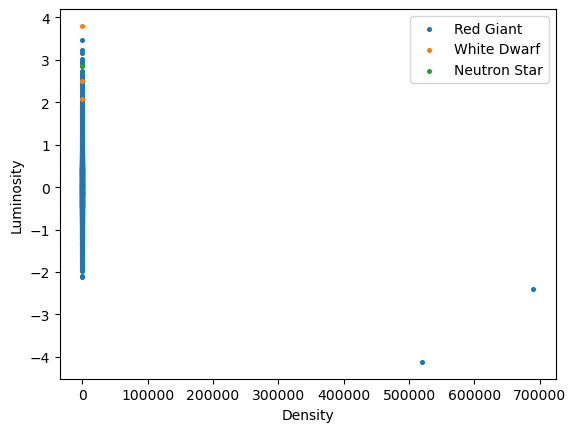

In [106]:
# plot 'density_dict' and 'lum_dict'

plot_scatter_multiple(density_dict, lum_dict, 'Density', 'Luminosity')  
 

**Food for thought:** As you can see, there are **two** extreme outliers with a very high density. If you are interested, you can try to find out the names of these stars, and why they have such extremely high densities (and low luminosities). What (**incorrect**) assumption did we make when we classified the `Star` objects in `star_classes`? Can you suggest a more **accurate** way of classifying the stars now, based on the data we have observed?

In [107]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


As you can see, almost all the `Star` objects have low *stellar density*, and the presence of a few extreme outliers is obscuring our view of the other `Star` objects. In fact, it turns out that there are only *27* `Star` objects in the dataset with a *stellar density* **greater than** *25*. We could get a much clearer view of the relationship between *stellar density* and `stellar_luminosity` if we did **not** plot these outliers.

#### Question 8: Create the same **scatter plot** as above, but exclude stars with *stellar density* **more than** *25*.

You **must** ignore all `Star` objects with **missing** `stellar_mass`, `stellar_radius`, or `stellar_luminosity` data. You **must** also ignore all `Star` objects with *stellar density* more than *25*.

You **must** first compute two **dictionaries**. The **keys** of both dictionaries must be the different **star classes**, and the corresponding values must be the **list** of **densities** and **list** of **luminosities** of `Star` objects of that **star class**. Then, you **must** use `plot_scatter_multiple` to plot the **density** against the **luminosity** of each **star class**.

Points possible: 4.0

In [108]:
# first compute and store the dictionaries 'density_dict_no_outliers', and 'lum_dict_no_outliers'
# do NOT plot just yet

density_dict_no_outliers = {}
lum_dict_no_outliers = {}

for star_class in star_classes:
    # TODO: add the 'star_class' key to 'density_dict' and 'lum_dict', initializing it with the value of an empty list
    density_dict_no_outliers[star_class] = []
    lum_dict_no_outliers[star_class] = []
    # TODO: loop through each 'star' in the 'star_class'
    for star in star_classes[star_class]:
        stellar_mass = stars_dict[star].stellar_mass
        stellar_radius = stars_dict[star].stellar_radius
        stellar_luminosity = stars_dict[star].stellar_luminosity
        # TODO: skip 'star' if mass, radius, or luminosity data is missing
        if None in [stellar_mass,stellar_radius,stellar_luminosity] or stellar_mass/stellar_radius**3 >25:
            continue
        density_dict_no_outliers[star_class].append(stellar_mass/stellar_radius**3)
        lum_dict_no_outliers[star_class].append(stellar_luminosity)
        # TODO: otherwise add the luminosity to the correct key of 'lum_dict'
       

# Do not display the variable

In [109]:
student_grader.check("q8", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q8...
Great job! You passed all test cases for this question.


True

Now, **plot** `density_dict_no_outliers` and `lum_dict_no_outliers` as **scatter plot** with the **x-axis** labelled *Density*, and the **y-axis** labelled *Luminosity*.

Your plot should look like this:

<div style="text-align: center;"><img src="images/q8.jpg" style="height: 400px;"/></div>

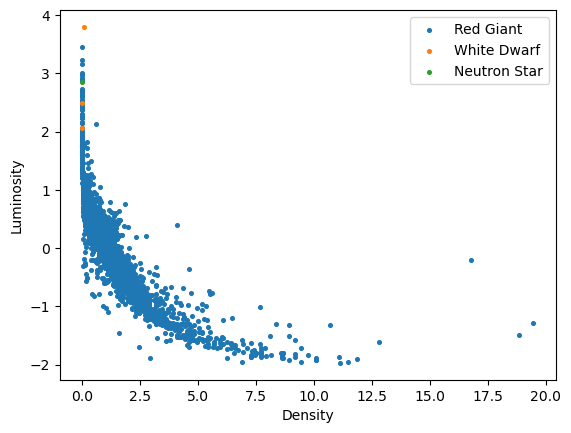

In [110]:
# plot 'density_dict_no_outliers' and 'lum_dict_no_outliers'

plot_scatter_multiple(density_dict_no_outliers, lum_dict_no_outliers, 'Density', 'Luminosity')
 

**Food for thought:** Can you guess the relationship between **density** and **luminosity**? Can you spot the `Star` objects in this graph which will end up as White Dwarfs and Neutron Stars? Do they appear to follow the same relationship as the Red Giants? How do they compare to the outliers you found in Question 7?

In [111]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


### Hertzsprung–Russell Diagram

The [Hertzsprung–Russell diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) is a scatter plot of stars showing the relationship between the stars' `stellar_luminosity` versus their `stellar_effective_temperature`. The diagram is exceedingly useful for understanding the stellar evolution of stars. We will now use the data we have available to plot this diagram ourselves, so we can better understand stellar evolution.

We want to plot the `stellar_effective_temperature` against the `stellar_luminosity`, but more importantly, we will use the **color** and **size** parameters to represent the `stellar_age` and `stellar_mass` of the `Star` objects as well. This will allow us to see the effects of `stellar_age` and `stellar_mass` on `stellar_effective_temperature` and `stellar_luminosity`.

#### Question 9: Create a **scatter plot** representing the `stellar_effective_temperature` (on the **x-axis**) against the `stellar_luminosity` (on the **y-axis**) of each `Star` object in `stars_dict`. Moreover, represent the `stellar_age` of each `Star` object using the **color** and represent the `stellar_mass` of each `Star` object using the **size** of the star.

You **must** first compute four **lists** containing the `stellar_effective_temperature`, `stellar_luminosity`, `stellar_age` and the `stellar_mass` of each `Star` object (which has **all** the data available). You **must** ignore any `Star` object which has any of these four attributes **missing**. Then, you **must** use `plot_scatter` to plot the `stellar_effective_temperature` against the `stellar_luminosity` with the `stellar_age` as the **color** and the `stellar_mass` as the **size** of the points.

Points possible: 4.0

In [112]:
# first compute and store the lists 'temp_list', 'lum_list', 'age_list', and 'mass_list'
# do NOT plot just yet

temp_list = []
lum_list = []
age_list = []
mass_list = []

for star in stars_dict.values():
    temp = star.stellar_effective_temperature
    lum = star.stellar_luminosity
    age = star.stellar_age
    mass = star.stellar_mass
    
    if None in [temp,lum,age,mass]:
        continue
        
    temp_list.append(temp)
    lum_list.append(lum)
    age_list.append(age)
    mass_list.append(mass)

# Do not display the variables

In [113]:
student_grader.check("q9", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q9...
Great job! You passed all test cases for this question.


True

Now, **plot** `temp_list` and `lum_list` as **scatter plot** with the **x-axis** labelled *Effective Temperature*, and the **y-axis** labelled *Luminosity*, **colored** using `age_list`, and **sized** using `mass_list`. Your plot should look like this:

<div style="text-align: center;"><img src="images/q9.jpg" style="height: 400px;"/></div>

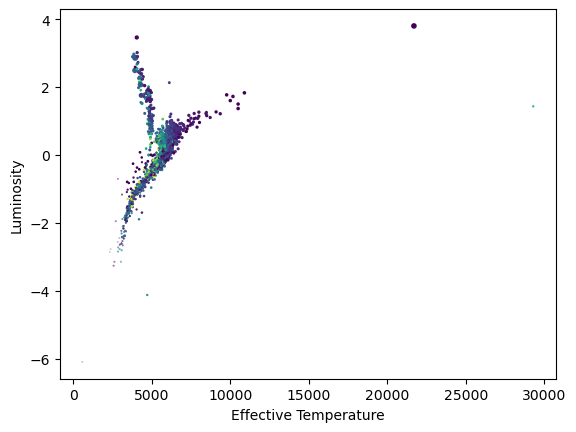

In [114]:
# plot 'temp_list' and 'lum_list' with 'age_list' as colors and 'mass_list' as sizes

plot_scatter(temp_list, lum_list, 'Effective Temperature', 'Luminosity', c=age_list, s=mass_list)
 

**Food for thought:** Can you tell if there is any relationship between the **temperature**, **luminosity**, **age**, and **mass** of the stars? You might want to remove the outliers with the extremely high `stellar_effective_temperature` to get a better view of the diagram. What effect does the **age** seem to have on the **temperature**? Recall that a **lighter** color implies that the value is higher, while a **darker** color implies that the value is lower. What effect does the **mass** have?

**Food for thought:** Notice that there are **two distinct** *clusters* of points in this diagram. If you are interested, look up more information on the Hertzsprung–Russell Diagram to understand what these clusters are. 

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


### Segment 3: Recursion

You are not done exploring the dataset, and you have more questions left to answer. However, something more important has happened! We have managed to find the data from the corrupted json file (`mapping_5.json`)!

If you will recall, when we were parsing the files in P10, we found that `mapping_5.json` was **broken**, and we couldn't read it. Therefore, we had no choice but to leave all the planets in `planets_5.csv` out of our analysis. Luckily for you now, the data has shown up intact in the directory `broken_data`. Unfortunately, the data is now no longer stored in a single file, but has been **split up** into **multiple files** and stored in **different subdirectories**.

In the lab portion, you created a function called `get_all_paths_in`. This can be used to help parse all the data stored within the `broken_data` directory.

#### Question 10: What are the **paths** of the files in the `toi` directory of the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_all_paths_in` function.

**Warning:** Remember that you **must** only use `os.path.join` to create paths.

Points possible: 3.0

In [115]:
# compute and store the answer in the variable 'broken_data_toi', then display it

broken_data_toi = get_all_paths_in(os.path.join('broken_data','toi'))

broken_data_toi

['broken_data/toi/tois.json']

In [116]:
student_grader.check("q10", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q10...
Great job! You passed all test cases for this question.


True

#### Question 11: What are the **paths** of the files in the `100` directory of the `kepler` directory of the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_all_paths_in` function.

**Hint:** You can pass multiple **strings** as arguments to `os.path.join` to join them together at the same time. For example, to get the path of the required directory here, you could say
```python
os.path.join("broken_data", "kepler", "100")
```

Points possible: 3.0

In [117]:
# compute and store the answer in the variable 'broken_data_keplers_100s', then display it

broken_data_keplers_100s = get_all_paths_in(os.path.join("broken_data", "kepler", "100"))

broken_data_keplers_100s

['broken_data/kepler/100/other/others.json',
 'broken_data/kepler/100/200/others.json',
 'broken_data/kepler/100/200/290/290s.json',
 'broken_data/kepler/100/200/220s.json',
 'broken_data/kepler/100/100/others.json',
 'broken_data/kepler/100/100/100s.json']

In [118]:
student_grader.check("q11", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q11...
Great job! You passed all test cases for this question.


True

#### Question 12: What are the **paths** of the files in the `other` directory of the `100` directory of the `kepler` directory of the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_all_paths_in` function.

Points possible: 3.0

In [124]:
# compute and store the answer in the variable 'broken_data_kepler_100_others', then display it

broken_data_kepler_100_others = get_all_paths_in(os.path.join("broken_data", "kepler", "100",'other'))
broken_data_kepler_100_others

['broken_data/kepler/100/other/others.json']

In [125]:
student_grader.check("q12", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q12...
Great job! You passed all test cases for this question.


True

#### Question 13: What are the **paths** of the files in the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_all_paths_in` function.

Points possible: 3.0

In [126]:
# compute and store the answer in the variable 'broken_data', then display it

broken_data = get_all_paths_in(os.path.join("broken_data"))

broken_data

['broken_data/toi/tois.json',
 'broken_data/others.json',
 'broken_data/kepler/other/others.json',
 'broken_data/kepler/100/other/others.json',
 'broken_data/kepler/100/200/others.json',
 'broken_data/kepler/100/200/290/290s.json',
 'broken_data/kepler/100/200/220s.json',
 'broken_data/kepler/100/100/others.json',
 'broken_data/kepler/100/100/100s.json',
 'broken_data/kepler/10/others.json',
 'broken_data/kepler/10/80s.json',
 'broken_data/kepler/10/30/30s.json',
 'broken_data/kepler/10/20s.json',
 'broken_data/k2s.json',
 'broken_data/hd/other/others.json',
 'broken_data/hd/10000/10000s.json',
 'broken_data/gj/gjs.json']

In [127]:
student_grader.check("q13", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q13...
Great job! You passed all test cases for this question.


True

### Data Structure 2: `all_planets_list`

We want to read the data that is stored inside the directory `broken_data`. We already have a function `get_planets` (from P10) which can read a CSV file and a JSON file and combine them to create a **list** of `Planet` objects. So, we can repeatedly call `get_planets` on the CSV file `planets_5.csv` and each of the JSON files inside `broken_data` to get a **list** of `Planet` objects of **all** the planets in `planets_5.csv`.

You **must** **create** the **list** `all_planets_list` by adding in all `Planet` objects from `planets_list`, and then also adding in the `Planet` objects in `planets_5.csv` and the directory `broken_data`.

**Hint:** You should loop through every file in the list `broken_data`, and use `get_planets` on `planets_5.csv` (inside the `data` directory), and this file (from the loop) to create a list of `Planet` objects, and then **extend** `all_planets_list` by the list of new `Planet` objects.

**Warning:** Do **not** update the value of the **list** `planets_list` when you do this. Otherwise, your answers to some of the previous questions will become incorrect. Instead, make sure that the new `Planet` objects are only added to `all_planets_list` and **not** to `planets_list`.

Points possible: 4.0

In [134]:
# create the variable 'all_planets_list' here,
# but do NOT display the variable at the end
# TODO: initialize 'all_planets_list'
all_planets_list = []
# TODO: add the planets in 'planets_list' to 'all_planets_list'
all_planets_list.extend(planets_list)
# TODO: loop through all paths in 'broken_data'
for path in broken_data:
    # TODO: use 'get_planets' to get the planets in this file and add them to 'all_planets_list' 
    planets = get_planets('data/planets_5.csv',path)
    all_planets_list.extend(planets)

In [135]:
student_grader.check("all_planets_list", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for all_planets_list...
Great job! You passed all test cases for this question.


True

You can verify that you have not made any mistakes by confirming that `all_planets_list` now has *5592* `Planet` objects in it.

### Segment 4: Exploring habitability of exoplanets:

Now that we have gathered the data on all the `Planet` objects, we are ready to have some fun with this dataset. Over the course of the rest of this project, we will try to find out if there are any planets in our dataset which could potentially support human habitation. Naturally, using the available data, we cannot say with any certainty that any particular planet is habitable, but we *can* say with some confidence when a planet is **not** habitable (notwithstanding major technological gains). That is exactly what we will do now.

### Task 4.1 Surface Gravitational Force:

It seems reasonable to expect that for humans to be able to survive on a planet, the gravitational force of the planet on its surface is not too different from that of the Earth.

We note that the `planet_mass` and `planet_radius` attributes of the `Planet` objects stores these values in units of the mass of the Earth, and the radius of the Earth respectively. So, the **ratio** of the gravitational force experienced on the surface of a given planet to the force experienced on the surface of the Earth can be computed as:

$$\frac{g_{\texttt{planet}}}{g_{\texttt{earth}}} = \frac{\texttt{planet mass}}{\texttt{planet radius}^{2}}$$

So, a **ratio** greater than 1 would imply that a person on the planet's surface would experience a greater force due to gravity than on Earth, while a value lower than 1 would imply that a person on the planet's surface would experience a lesser force due to gravity than on Earth.

### Function 1: `get_surface_gravity(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** the **ratio** of the gravitational force experienced on the surface of a given planet to the force experienced on the surface of the Earth. If either the `planet_mass` or `planet_radius` data is **missing**, then your function **must** return `None`.

Points possible: 4.0

In [140]:
# define the function 'get_surface_gravity' here

def get_surface_gravity(planet):
    planet_mass = planet.planet_mass
    planet_radius = planet.planet_radius
    if None in [planet_mass,planet_radius]:
        return None
    ratios = planet_mass/planet_radius**2
    return ratios

In [141]:
student_grader.check("get_surface_gravity", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for get_surface_gravity...
Great job! You passed all test cases for this question.


True

#### Question 14: What is the **ratio** of gravitational force experienced on the surface of the planet *GJ 674 b* to the gravitational force experienced on the surface of the Earth?

You will have to first loop through `all_planets_list` to identify the correct `Planet` object by its planet_name attribute. Remember to `break` out of your loop after you identify the correct `Planet` object.

Points possible: 4.0

In [145]:
# compute and store the answer in the variable 'gj_674_b_gravity', then display it
for planet in all_planets_list:
    if planet.planet_name == 'GJ 674 b':
        gj_674_b = planet
    
gj_674_b_gravity = get_surface_gravity(gj_674_b)
gj_674_b_gravity

1.0000991982973964

In [146]:
student_grader.check("q14", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q14...
Great job! You passed all test cases for this question.


True

### Task 4.2: Distance to the star

Planets follow **elliptical** orbits around their host star. The `eccentricity` of a planet's orbit is a number that measures *how* elliptical the orbit is. An eccentricity of *0* would imply that the orbit is in fact perfectly circular, while an eccentricity close to *1* would imply that the orbit is very skewed and elliptical. As you may expect, if a planet has a highly eccentric orbit, its distance to its host star would vary wildly, leading to a highly variable climate. To determine if a planet could support human habitation, it is therefore important to know the closest and shortest distances between the planet and its host star.

We can compute these quantities using the attributes `eccentricity` and `semi_major_radius` of each `Planet` object. These distances can be computed as:

$$\texttt{shortest distance} = \texttt{semi major radius} \times (1 - \texttt{abs}(\texttt{eccentricity}))$$

$$\texttt{longest distance} = \texttt{semi major radius} \times (1 + \texttt{abs}(\texttt{eccentricity}))$$

### Function 2: `get_distances_to_star(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** a **list** of two **floats**. The first float should be the **shortest distance** of the `Planet` object to its host star, and the second float should be the **longest distance** to its host star. If either the `eccentricity` or `semi_major_radius` data of the `Planet` is missing, then the function **must** return `None`.

Points possible: 4.0

In [147]:
# define the function 'get_distances_to_star' here

def get_distances_to_star(planet):
    planet_eccentricity = planet.eccentricity
    planet_semi_major_radius = planet.semi_major_radius
    if None in [planet_eccentricity,planet_semi_major_radius]:
        return None
    shortest_distance = planet_semi_major_radius*(1-abs(planet_eccentricity))
    longest_distance = planet_semi_major_radius*(1+abs(planet_eccentricity))
    return [shortest_distance,longest_distance]
 

In [148]:
student_grader.check("get_distances_to_star", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for get_distances_to_star...
Great job! You passed all test cases for this question.


True

#### Question 15: Find the **shortest** and **longest** distances for the planet *b Cen AB b* to its host star.

Your output **must** be a **list** of two **floats** representing the **shortest** and **longest** distances to its host star. Remember to `break` out of your loop after you identify the correct `Planet` object.

Points possible: 4.0

In [149]:
# compute and store the answer in the variable 'distances_to_star_b_cen_ab_b', then display it
for planet in all_planets_list:
    if planet.planet_name == 'b Cen AB b':
        b_cen_ab_b = planet

distances_to_star_b_cen_ab_b = get_distances_to_star(b_cen_ab_b)
distances_to_star_b_cen_ab_b

[333.59999999999997, 778.4]

In [150]:
student_grader.check("q15", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q15...
Great job! You passed all test cases for this question.


True

### Task 4.3: Presence of Liquid Water

It is safe to say that planets which cannot sustain liquid are inhabitable. While we do not have any data on whether the `Planet` objects in our dataset have naturally occurring water, we are able to determine whether the planet can *support* liquid water based on its distance to its host star, and the luminosity of this star. 

Astronomers have [computed](https://pubmed.ncbi.nlm.nih.gov/11536936/) that for Earth-like planets, there is a certain range of distances that a planet can have to its host star, which depends on the `luminosity` of the star, within which, water on the planet's surface can stay in liquid form. These distances are as follows:

$$\texttt{liquid water shortest dist} = \sqrt{\frac{\texttt{luminosity}}{1.15}}$$

$$\texttt{liquid water longest dist} = \sqrt{\frac{\texttt{luminosity}}{0.53}}$$

In our dataset, the `stellar_luminosity` is stored in units of the logarithm of the absolute luminosity. So, the distances can be computed from our dataset as follows:

$$\texttt{liquid water shortest dist} = \sqrt{\frac{10^{\texttt{stellar luminosity}}}{1.15}}$$

$$\texttt{liquid water longest dist} = \sqrt{\frac{10^{\texttt{stellar luminosity}}}{0.53}}$$

### Function 3: `get_liquid_water_distances(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** a **list** of two **floats**. The first float should be the **shortest distance** the `Planet` object can be to its host star while being able to support liquid water, and the second float should be the **longest distance** it can be to its host star while being able to support liquid water. If the `stellar_luminosity` data of the host `Star` object is missing, then the function **must** return `None`.

Points possible: 4.0

In [151]:
# define the function 'get_liquid_water_distances' here

def get_liquid_water_distances(planet):
    host_star = planet.host_name
    stellar_luminosity = stars_dict[host_star].stellar_luminosity
    if stellar_luminosity == None:
        return None
    shortest_distance = (10**(stellar_luminosity)/1.15)**0.5
    longest_distance = (10**(stellar_luminosity)/0.53)**0.5
    return [shortest_distance,longest_distance]


In [152]:
student_grader.check("get_liquid_water_distances", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for get_liquid_water_distances...
Great job! You passed all test cases for this question.


True

#### Question 16: Find the **shortest** and **longest** distances for the planet *Kepler-197 e* from its host star, at which it can support liquid water.

Your output **must** be a **list** of two **floats** representing the **shortest** and **longest** distances that the planet can be from its host star and still support liquid water. Remember to `break` out of your loop after you identify the correct `Planet` object.

Points possible: 4.0

In [153]:
# compute and store the answer in the variable 'liquid_water_distances_kepler_197_e', then display it

for planet in all_planets_list:
    if planet.planet_name == 'Kepler-197 e':
        kepler_197_e = planet

liquid_water_distances_kepler_197_e = get_liquid_water_distances(kepler_197_e)
liquid_water_distances_kepler_197_e


[1.204068181137186, 1.7736260760497164]

In [154]:
student_grader.check("q16", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q16...
Great job! You passed all test cases for this question.


True

#### Question 17: **List** the names (`planet_name`) of all the `Planet` objects which can support liquid water when they are at **both** their **shortest** and **longest** distances to their host star.

Your output **must** be a **list**. You **must** ignore `Planet` objects with missing `eccentricity`, or `semi_major_radius` data and planets whose host `Star` has missing `stellar_luminosity` data.

**Hint:** You can find the actual shortest and longest distances of the planet with the `get_distances_to_star` function, and the shortest and longest distances at which liquid water can be supported with the `get_liquid_water_distances` function. You must consider `Planet` objects for which the actual distances to their host star lie **within** the distances at which liquid water can be supported.

Points possible: 4.0

In [202]:
# compute and store the answer in the variable 'planets_with_liquid_water', then display it

planets_with_liquid_water = []

for planet in all_planets_list:
    
    planet_distances = get_distances_to_star(planet)
    liquid_distances = get_liquid_water_distances(planet)
    host_star = planet.host_name
    stellar_luminosity = stars_dict[host_star].stellar_luminosity
    
    if stellar_luminosity == None:
        continue
    planet_eccentricity = planet.eccentricity
    planet_semi_major_radius = planet.semi_major_radius
    if None in [planet_eccentricity,planet_semi_major_radius]:
        continue

    
    if planet_distances[0]>= liquid_distances[0] and planet_distances[1]<=liquid_distances[1]:
        planets_with_liquid_water.append(planet.planet_name)

planets_with_liquid_water

['GJ 422 b',
 'HD 10697 b',
 'HD 114729 b',
 'HD 145934 b',
 'HD 147379 b',
 'HD 17674 b',
 'HD 188015 b',
 'HD 564 b',
 'Kepler-1341 b',
 'Kepler-1410 b',
 'Kepler-1540 b',
 'Kepler-1544 b',
 'Kepler-1554 b',
 'Kepler-1593 b',
 'Kepler-1628 b',
 'Kepler-1647 b',
 'Kepler-1652 b',
 'Kepler-1653 b',
 'Kepler-1661 b',
 'Kepler-1690 b',
 'Kepler-1868 b',
 'Kepler-1981 b',
 'Kepler-442 b',
 'Kepler-443 b',
 'Kepler-452 b',
 'Kepler-453 b',
 'Kepler-705 b',
 'Proxima Cen b',
 'HD 156668 c',
 'HD 159868 b',
 'HD 28185 b',
 'HD 45364 c',
 'Kepler-1086 c',
 'Kepler-1143 c',
 'Kepler-155 c',
 'Kepler-283 c',
 'Kepler-553 c',
 'Kepler-712 c',
 'TOI-199 c',
 'GJ 180 c',
 'GJ 433 d',
 'Kepler-174 d',
 'Kepler-454 c',
 'Kepler-47 c',
 "Teegarden's Star b",
 'TOI-700 d',
 'TRAPPIST-1 d',
 'TRAPPIST-1 e',
 'Kepler-68 d',
 'HD 160691 b',
 'HD 191939 g',
 'HD 34445 f',
 'GJ 667 C c',
 'GJ 667 C f']

In [195]:
student_grader.check("q17", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q17...
Great job! You passed all test cases for this question.


True

### Task 4.4: Surface temperature

The temperature on the surface of the planet is another important criteria for deciding whether a planet is habitable. The `equilibrium_temperature` of a `Planet` is the temperature that the planet would be, if it were a [black body](https://en.wikipedia.org/wiki/Black_body) (i.e., if it were able to absorb all the radiation it receives from its host star). However, most planets are not perfect black bodies and reflect some of the radiation that they receive from their host star. Astronomers use the quantity [albedo](https://en.wikipedia.org/wiki/Albedo) to measure how much radiation is reflected by the planet. An albedo of *0* implies that the planet is a perfect black body which absorbs all its radiation, while an albedo of *1* implies that the planet is perfectly reflective, and does not retain any radiation. In the real world, most planets have an albedo value between *0* and *0.5*.

Using the albedo of a planet, we can compute the temperature on the surface of a planet as follows

$$ \texttt{surface temperature} = \left(1- \texttt{albedo}\right) ^{1/4} \times \texttt{equilibrium temperature}$$

Unfortunately, we do **not** have the albedo values of the `Planet` objects in our dataset. So, we will instead make some educated guesses and find the **maximum** and **minimum** surface temperatures, assuming that the albedo is within the range of *0* to *0.5* (which is known to be the case for most planets).

### Function 4: `get_surface_temperatures(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** a **list** of two **floats**. The first float should be the **minimum surface temperature** of the `Planet` object (which can be computed by assuming a **albedo** value of *0.5*), and the second float should be the **maximum surface temperature** (which can be computed by assuming a **albedo** value of *0.0*). If the `equilibrium_temperature` data of the `Planet` is missing, then the function **must** return `None`.

Points possible: 4.0

In [196]:
# define the function 'get_surface_temperatures' here

def get_surface_temperatures(planet):
    if planet.equilibrium_temperature == None:
        return None
    equilibrium_temperature = planet.equilibrium_temperature
    min_surface_temperature = (1-0.5)**(0.25)*equilibrium_temperature
    max_surface_temperature = equilibrium_temperature
    return [min_surface_temperature,max_surface_temperature]
 

In [197]:
student_grader.check("get_surface_temperatures", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for get_surface_temperatures...
Great job! You passed all test cases for this question.


True

#### Question 18: Find the **minimum** and **maximum** surface temperatures for the planet *HD 20794 d*.

Your output **must** be a **list** of two **floats** representing the **minimum** and **maximum** surface temperatures. Remember to `break` out of your loop after you identify the correct `Planet` object.

Points possible: 4.0

In [198]:
# compute and store the answer in the variable 'surface_temp_hd_20794_d', then display it

for planet in all_planets_list:
    if planet.planet_name == 'HD 20794 d':
        hd_20794_d = planet

surface_temp_hd_20794_d = get_surface_temperatures(hd_20794_d)
surface_temp_hd_20794_d
 

[326.2678091184412, 388.0]

In [199]:
student_grader.check("q18", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q18...
Great job! You passed all test cases for this question.


True

#### Question 19: **List** the names (`planet_name`) of all the `Planet` objects whose **minimum surface temperature** is **greater** than *263* (Kelvin) and **maximum surface temperature** is **less** than *323* (Kelvin).

Your output **must** be a **list**. You **must** ignore `Planet` objects with missing `equilibrium_temperature` data.

Points possible: 4.0

In [200]:
# compute and store the answer in the variable 'pleasant_planets', then display it

pleasant_planets = []

for planet in all_planets_list:
    if get_surface_temperatures(planet) == None:
        continue
    if get_surface_temperatures(planet)[0]>263 and get_surface_temperatures(planet)[1]<323:
        pleasant_planets.append(planet.planet_name)
        
pleasant_planets

['K2-323 b',
 'K2-9 b',
 'Kepler-1503 b',
 'Kepler-1512 b',
 'Kepler-505 b',
 'Kepler-577 b',
 'TOI-4562 b',
 'EPIC 212737443 c',
 'GJ 3929 c',
 'KOI-1783.02',
 'Kepler-1085 b',
 'Kepler-436 b',
 'Kepler-610 c',
 'Kepler-281 d',
 'Kepler-351 d',
 'TOI-712 d',
 'Kepler-169 f',
 'Kepler-186 e']

In [201]:
student_grader.check("q19", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q19...
Great job! You passed all test cases for this question.


True

### Task 4.5: Putting it all together

We are finally ready to combine all our various criteria of habitability to make a list of planets which satisfy all the criteria above, and could potentially be habitable. Unsurprisingly, if we are too strict with our expectations, no planets in the dataset will meet them. So, allowing for some technological improvements in the future, we will make more modest requests of the planets in our dataset.

#### Question 20: List the `planet_name` of all the `Planet` objects which satisfy the criteria below:

1. The gravitational force experienced on the surface of the `Planet` must be **greater** than *0.75* and **less** than *1.25* times that of the Earth.
2. The planet must always **lie within** the range at which it is able to support liquid water.
3. The **minimum** surface temperature must be **greater** than *200* and the **maximum** surface temperature must be **less** than *350*.

Your output **must** be a **list** of **strings**. You **must** ignore any `Planet` objects for which you cannot determine if any of these criteria are met.

Points possible: 4.0

In [209]:
# compute and store the answer in the variable 'habitable_planets', then display it

habitable_planets = []

for planet in all_planets_list:
    if get_surface_gravity(planet) != None and get_surface_gravity(planet)>0.75 and get_surface_gravity(planet)<1.25:
        if None not in [get_distances_to_star(planet),get_liquid_water_distances(planet)]  and get_distances_to_star(planet)[0]> get_liquid_water_distances(planet)[0] and get_distances_to_star(planet)[1]< get_liquid_water_distances(planet)[1]:
            if get_surface_temperatures(planet) != None and get_surface_temperatures(planet)[0]>200 and get_surface_temperatures(planet)[1] < 350:
                habitable_planets.append(planet.planet_name)
    
habitable_planets

['Kepler-1341 b',
 'Kepler-1410 b',
 'Kepler-1540 b',
 'Kepler-1544 b',
 'Kepler-1554 b',
 'Kepler-1593 b',
 'Kepler-1628 b',
 'Kepler-1652 b',
 'Kepler-1653 b',
 'Kepler-1661 b',
 'Kepler-1690 b',
 'Kepler-452 b',
 'Kepler-705 b',
 'Kepler-155 c',
 'Kepler-283 c',
 "Teegarden's Star b",
 'TOI-700 d',
 'TRAPPIST-1 e',
 'HD 191939 g']

In [210]:
student_grader.check("q20", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q20...
Great job! You passed all test cases for this question.


True

**Food for thought:** If you are interested, you can play around these values more, and introduce more stringent requirements to try and find the single **most** habitable planet. Notice how so many of the habitable planets we found start with the string *Kepler*. Do you know why?

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


## Submission

Make sure you have run all cells in your notebook in order before submitting on Gradescope. Your notebook should not contain any uncaught Exceptions, otherwise the Gradescope autograder will not give you any points.